In [257]:
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
# ensemble learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
# metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve


Introduction. 
The project will concern the classification of malicious software.
For the computer's defence system to properly aggregate, it is essential to recognize the threat
and the introduction of appropriate tools for a given type of danger. Additionally presented
in the project, the algorithm can be used for reporting purposes, to know how many and what malware are attacking us, which will allow
taking appropriate precautions.

Loading data

In [258]:
df = pd.read_csv('data.csv')


Dataset analysis

I'm doing a general data check. I check how many records I have, and how many variables I have. What type of variables predominate, or continuous or integer variables.

In [259]:
df

asm_commands_add  asm_commands_call  asm_commands_cdq  \
0                   436              646.0               0.0   
1                   469              262.0               0.0   
2                  1587             1828.0               0.0   
3                   213              227.0               0.0   
4                    36               76.0               0.0   
...                 ...                ...               ...   
10863               235               98.0              36.0   
10864                60               43.0               0.0   
10865               277              151.0               1.0   
10866               101               45.0               0.0   
10867               267              134.0               1.0   

       asm_commands_cld  asm_commands_cli  asm_commands_cmc  asm_commands_cmp  \
0                  10.0               9.0               0.0             228.0   
1                   4.0               1.0               4.0             185.0   
2                   0.0              31.0               0.0             689.0   
3                   0.0               3.0               0.0             127.0   
4                   0.0               0.0               0.0              15.0   
...                 ...               ...               ...               ...   
10863              26.0               0.0              22.0             155.0   
10864               0.0               9.0               0.0               1.0   
10865               8.0              11.0               1.0              58.0   
10866              16.0               1.0               0.0              31.0   
10867              14.0               6.0               1.0              44.0   

       asm_commands_cwd  asm_commands_daa  asm_commands_dd  ...  \
0                   0.0              56.0            89930  ...   
1                   4.0              20.0             3464  ...   
2                   0.0             904.0            24833  ...   
3                   0.0             132.0            71979  ...   
4                   0.0               0.0              112  ...   
...                 ...               ...              ...  ...   
10863              28.0              56.0             1768  ...   
10864               0.0              39.0             2003  ...   
10865               2.0             128.0             6319  ...   
10866              16.0               3.0              708  ...   
10867               3.0             127.0             6320  ...   

       asm_commands_sti  asm_commands_stos  asm_commands_sub  \
0                   1.0                0.0             892.0   
1                   3.0                7.0             846.0   
2                   1.0                0.0            4005.0   
3                   0.0                0.0             437.0   
4                   2.0                3.0              82.0   
...                 ...                ...               ...   
10863              33.0               37.0             368.0   
10864               0.0                0.0               0.0   
10865               0.0               18.0             463.0   
10866               0.0                1.0             111.0   
10867               0.0               17.0             368.0   

       asm_commands_test  asm_commands_wait  asm_commands_xchg  \
0                   53.0               10.0                0.0   
1                    8.0                0.0                9.0   
2                  680.0               44.0                0.0   
3                   78.0                0.0                0.0   
4                   16.0                0.0                0.0   
...                  ...                ...                ...   
10863               36.0                9.0               67.0   
10864                0.0                0.0                0.0   
10865               30.0               16.0               34.0   
10866               13.0       

In [260]:
df.shape

(10868, 69)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asm_commands_add    10868 non-null  int64  
 1   asm_commands_call   10868 non-null  float64
 2   asm_commands_cdq    10868 non-null  float64
 3   asm_commands_cld    10868 non-null  float64
 4   asm_commands_cli    10868 non-null  float64
 5   asm_commands_cmc    10868 non-null  float64
 6   asm_commands_cmp    10868 non-null  float64
 7   asm_commands_cwd    10868 non-null  float64
 8   asm_commands_daa    10868 non-null  float64
 9   asm_commands_dd     10868 non-null  int64  
 10  asm_commands_dec    10868 non-null  float64
 11  asm_commands_dw     10868 non-null  float64
 12  asm_commands_endp   10868 non-null  float64
 13  asm_commands_faddp  10868 non-null  float64
 14  asm_commands_fchs   10868 non-null  float64
 15  asm_commands_fdiv   10868 non-null  float64
 16  asm_

In [262]:
for col in df:
    print(df[col].unique())

[ 436  469 1587 ... 2036  938 1633]
[ 646.  262. 1828. ... 2223. 2820. 1124.]
[0.000e+00 1.600e+01 2.500e+01 1.100e+01 1.000e+00 1.800e+01 2.000e+00
 2.200e+01 1.000e+01 1.700e+01 4.000e+00 2.900e+01 6.000e+00 7.000e+00
 1.200e+01 3.800e+01 1.500e+01 1.200e+02 5.400e+01 2.600e+01 2.000e+01
 2.700e+01 2.390e+02 4.400e+01 3.000e+00 1.900e+01 5.040e+02 3.300e+01
 1.400e+01 1.300e+01 4.600e+01 2.400e+01 2.100e+01 3.900e+01 3.700e+01
 5.000e+00 6.700e+01 7.200e+01 2.410e+02 1.310e+02 8.800e+01 3.100e+01
 9.000e+00 8.000e+00 2.920e+02 1.770e+02 4.300e+01 9.800e+01 5.700e+01
 3.000e+01 5.200e+01 1.400e+02 8.200e+01 1.370e+02 5.600e+01 1.430e+02
 1.280e+02 5.100e+01 9.300e+01 1.210e+02 4.500e+01 4.200e+01 6.730e+02
 8.600e+01 5.800e+01 7.000e+01 4.000e+01 2.050e+02 6.300e+01 7.100e+01
 1.130e+02 4.360e+02 7.400e+01 3.500e+01 1.610e+02 7.500e+01 1.880e+02
 3.210e+02 8.400e+01 1.450e+02 6.600e+01 9.500e+01 8.700e+01 4.800e+01
 5.500e+01 9.900e+01 2.100e+02 2.800e+02 2.800e+01 3.200e+01 1.520e+02

Analysis of uniques in variables

In [263]:
print(df.apply(lambda col: col.unique()))

asm_commands_add     [436, 469, 1587, 213, 36, 58, 202, 604, 1812, ...
asm_commands_call    [646.0, 262.0, 1828.0, 227.0, 76.0, 13.0, 320....
asm_commands_cdq     [0.0, 16.0, 25.0, 11.0, 1.0, 18.0, 2.0, 22.0, ...
asm_commands_cld     [10.0, 4.0, 0.0, 1.0, 3.0, 10218.0, 5.0, 24.0,...
asm_commands_cli     [9.0, 1.0, 31.0, 3.0, 0.0, 6.0, 23.0, 2.0, 7.0...
                                           ...                        
asm_commands_xchg    [0.0, 9.0, 4.0, 8.0, 148.0, 1.0, 91.0, 3.0, 2....
asm_commands_xor     [162.0, 19.0, 418.0, 199.0, 18.0, 10.0, 95.0, ...
line_count_asm       [118529, 7937, 90625, 83201, 12289, 14337, 152...
size_asm             [6874624, 460288, 5256192, 4825600, 712704, 83...
Class                                      [2, 8, 9, 1, 6, 3, 7, 4, 5]
Length: 69, dtype: object


In [264]:
df.nunique()

asm_commands_add     2122
asm_commands_call    1993
asm_commands_cdq      191
asm_commands_cld      210
asm_commands_cli      200
                     ... 
asm_commands_xchg     196
asm_commands_xor     1309
line_count_asm        911
size_asm              990
Class                   9
Length: 69, dtype: int64

In [265]:
for col in X_train:
    print(f'{col}, {X_train[col].dtype}')
    print(X_train[col].nunique())
    print()

asm_commands_add, int64
1819

asm_commands_call, float64
1676

asm_commands_cdq, float64
165

asm_commands_cld, float64
169

asm_commands_cli, float64
171

asm_commands_cmc, float64
46

asm_commands_cmp, float64
1289

asm_commands_cwd, float64
44

asm_commands_daa, float64
841

asm_commands_dd, int64
4482

asm_commands_dec, float64
1282

asm_commands_dw, float64
2597

asm_commands_endp, float64
820

asm_commands_faddp, float64
70

asm_commands_fchs, float64
51

asm_commands_fdiv, float64
84

asm_commands_fdivr, float64
47

asm_commands_fistp, float64
51

asm_commands_fld, float64
278

asm_commands_fstp, float64
276

asm_commands_fword, float64
125

asm_commands_fxch, float64
99

asm_commands_imul, float64
498

asm_commands_in, int64
1966

asm_commands_inc, float64
676

asm_commands_ins, float64
297

asm_commands_jb, float64
449

asm_commands_je, float64
295

asm_commands_jg, float64
457

asm_commands_jl, float64
542

asm_commands_jmp, float64
1115

asm_commands_jnb, float64
263

asm_co

I check for missing values

In [266]:
df.isna().sum()

asm_commands_add     0
asm_commands_call    0
asm_commands_cdq     0
asm_commands_cld     0
asm_commands_cli     0
                    ..
asm_commands_xchg    0
asm_commands_xor     0
line_count_asm       0
size_asm             0
Class                0
Length: 69, dtype: int64

In [267]:
df.isna().sum().sum()

0

I check the distribution of individual variables. This analysis shows that data standardization should be done
increase the accuracy of the model.

In [268]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()


In [269]:
num_columns

['asm_commands_add',
 'asm_commands_call',
 'asm_commands_cdq',
 'asm_commands_cld',
 'asm_commands_cli',
 'asm_commands_cmc',
 'asm_commands_cmp',
 'asm_commands_cwd',
 'asm_commands_daa',
 'asm_commands_dd',
 'asm_commands_dec',
 'asm_commands_dw',
 'asm_commands_endp',
 'asm_commands_faddp',
 'asm_commands_fchs',
 'asm_commands_fdiv',
 'asm_commands_fdivr',
 'asm_commands_fistp',
 'asm_commands_fld',
 'asm_commands_fstp',
 'asm_commands_fword',
 'asm_commands_fxch',
 'asm_commands_imul',
 'asm_commands_in',
 'asm_commands_inc',
 'asm_commands_ins',
 'asm_commands_jb',
 'asm_commands_je',
 'asm_commands_jg',
 'asm_commands_jl',
 'asm_commands_jmp',
 'asm_commands_jnb',
 'asm_commands_jno',
 'asm_commands_jo',
 'asm_commands_jz',
 'asm_commands_lea',
 'asm_commands_mov',
 'asm_commands_mul',
 'asm_commands_not',
 'asm_commands_or',
 'asm_commands_out',
 'asm_commands_outs',
 'asm_commands_pop',
 'asm_commands_push',
 'asm_commands_rcl',
 'asm_commands_rcr',
 'asm_commands_rep',
 'asm_

*** asm_commands_add: 2122


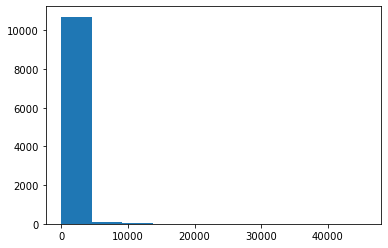

*** asm_commands_call: 1993


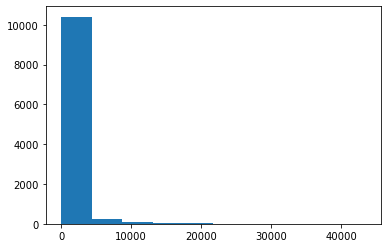

*** asm_commands_cdq: 191


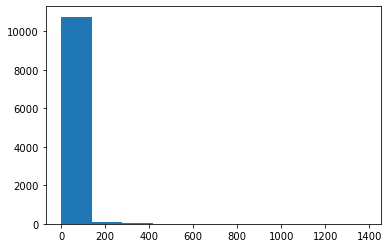

*** asm_commands_cld: 210


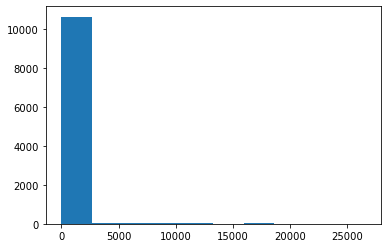

*** asm_commands_cli: 200


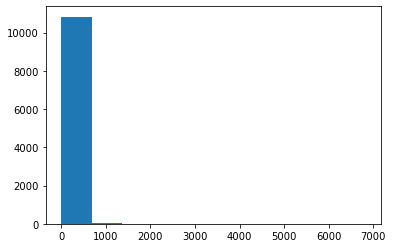

*** asm_commands_cmc: 54


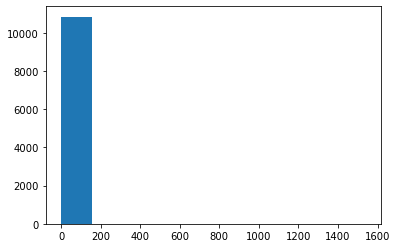

*** asm_commands_cmp: 1563


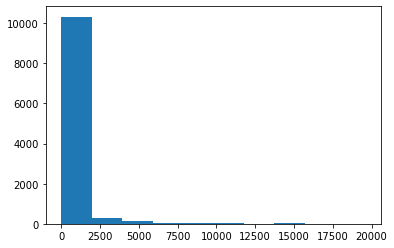

*** asm_commands_cwd: 46


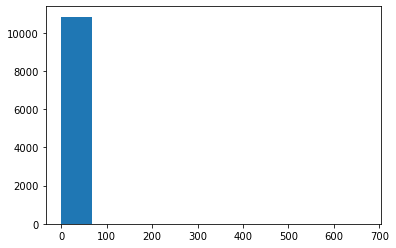

*** asm_commands_daa: 1007


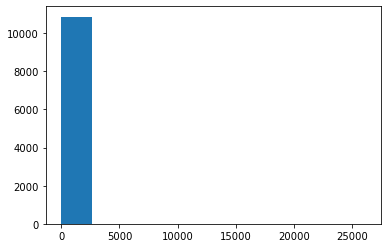

*** asm_commands_dd: 6180


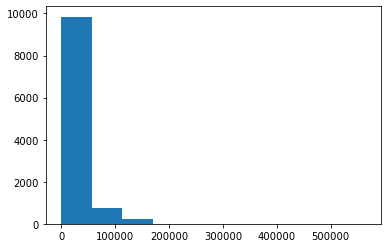

*** asm_commands_dec: 1495


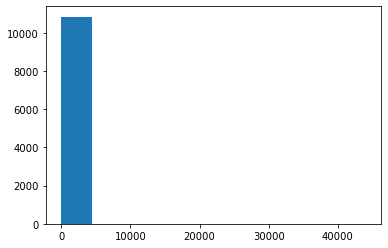

*** asm_commands_dw: 3143


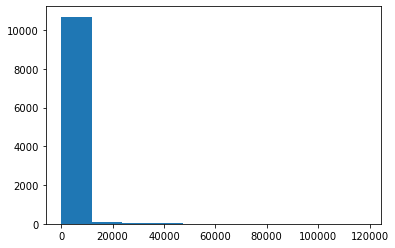

*** asm_commands_endp: 975


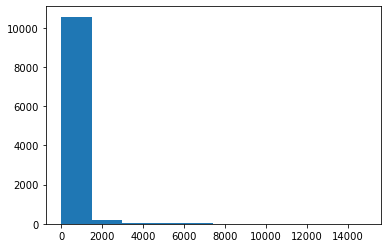

*** asm_commands_faddp: 80


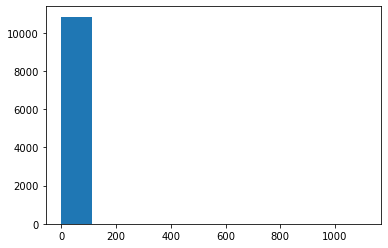

*** asm_commands_fchs: 56


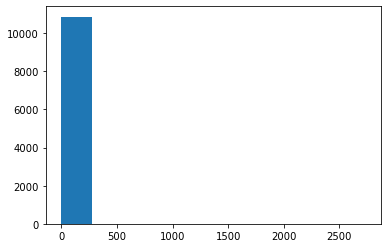

*** asm_commands_fdiv: 92


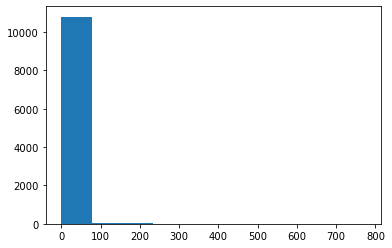

*** asm_commands_fdivr: 52


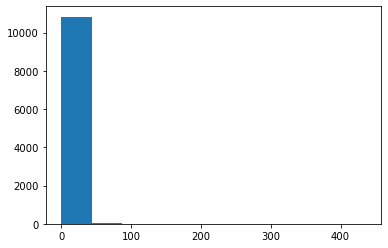

*** asm_commands_fistp: 55


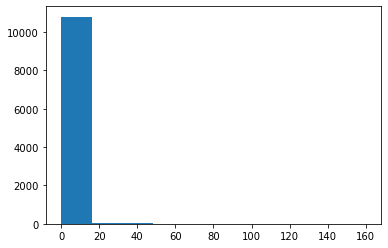

*** asm_commands_fld: 337


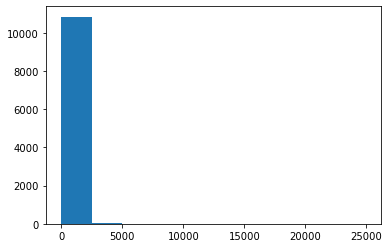

*** asm_commands_fstp: 327


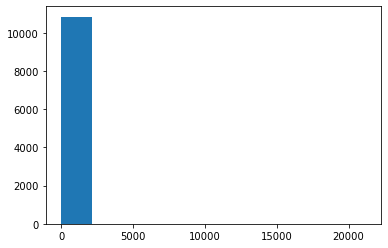

*** asm_commands_fword: 142


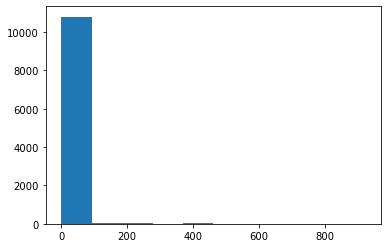

*** asm_commands_fxch: 116


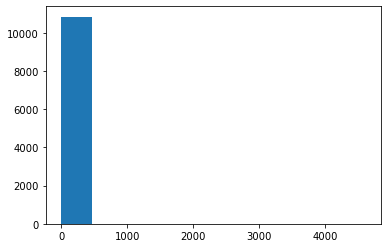

*** asm_commands_imul: 595


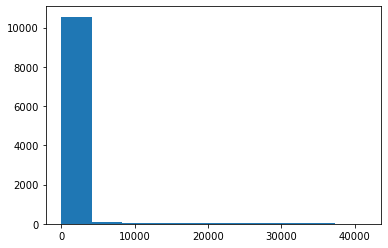

*** asm_commands_in: 2314


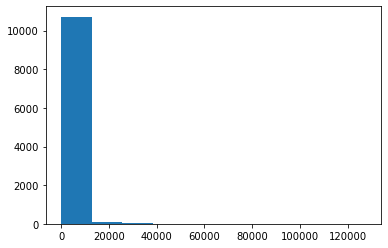

*** asm_commands_inc: 795


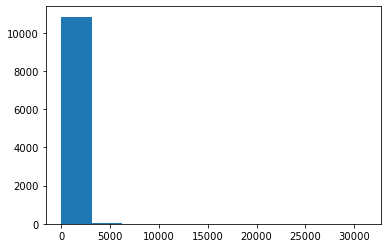

*** asm_commands_ins: 353


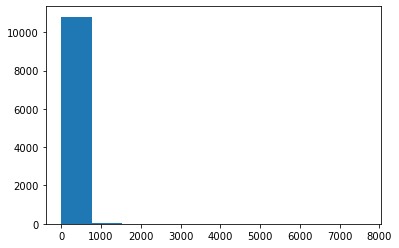

*** asm_commands_jb: 526


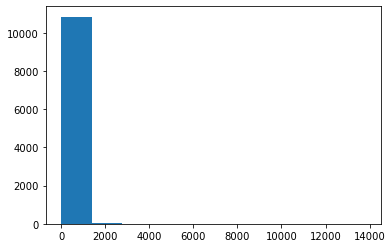

*** asm_commands_je: 354


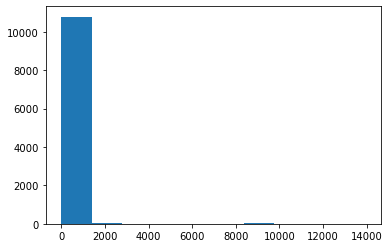

*** asm_commands_jg: 516


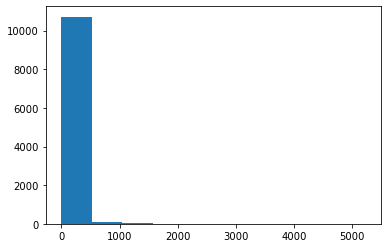

*** asm_commands_jl: 629


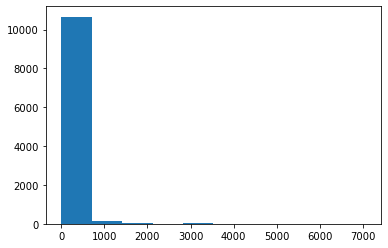

*** asm_commands_jmp: 1351


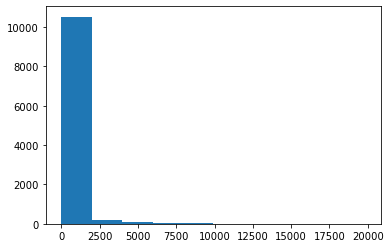

*** asm_commands_jnb: 307


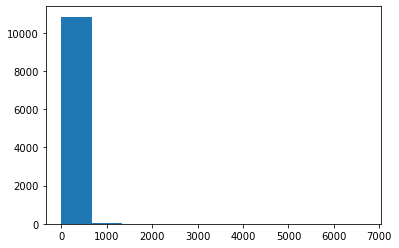

*** asm_commands_jno: 51


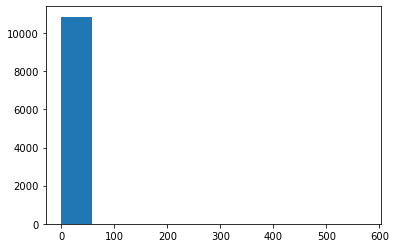

*** asm_commands_jo: 115


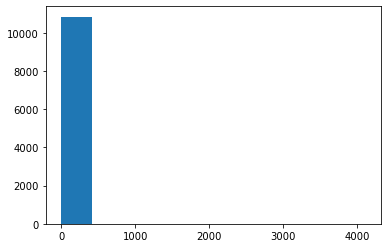

*** asm_commands_jz: 1268


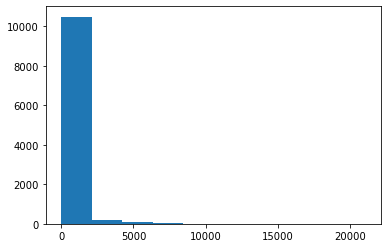

*** asm_commands_lea: 1479


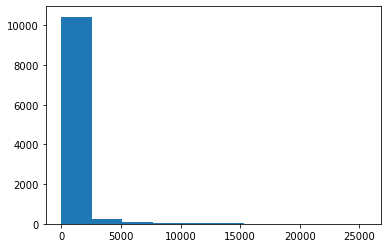

*** asm_commands_mov: 3805


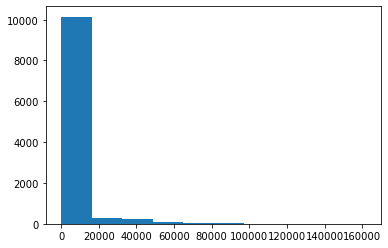

*** asm_commands_mul: 655


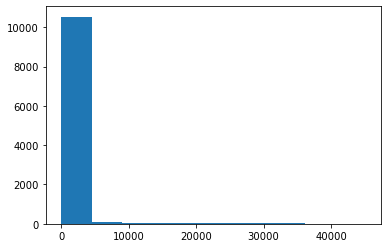

*** asm_commands_not: 329


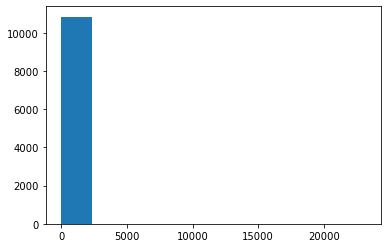

*** asm_commands_or: 4161


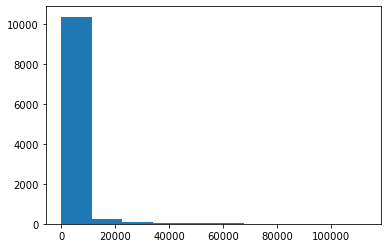

*** asm_commands_out: 258


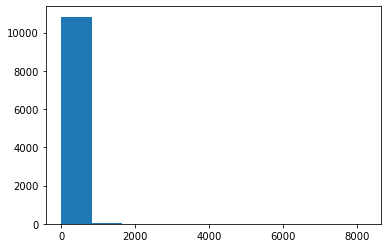

*** asm_commands_outs: 78


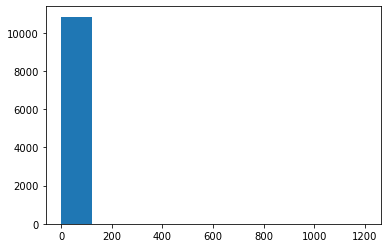

*** asm_commands_pop: 1643


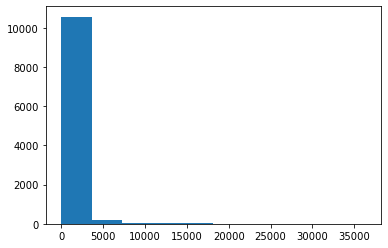

*** asm_commands_push: 2645


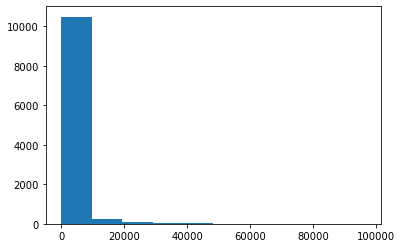

*** asm_commands_rcl: 121


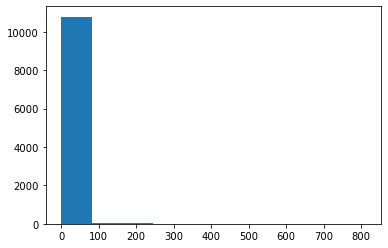

*** asm_commands_rcr: 93


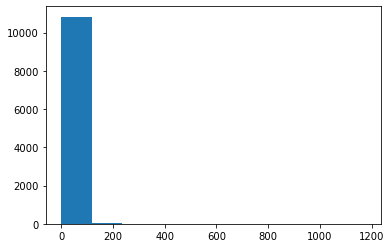

*** asm_commands_rep: 328


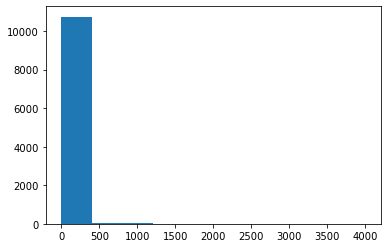

*** asm_commands_ret: 1238


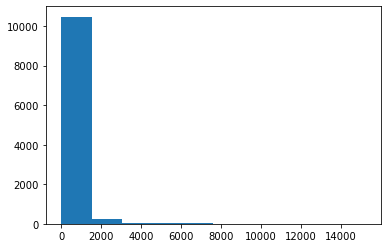

*** asm_commands_rol: 291


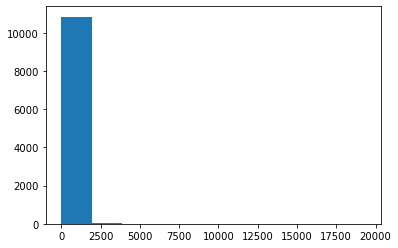

*** asm_commands_ror: 338


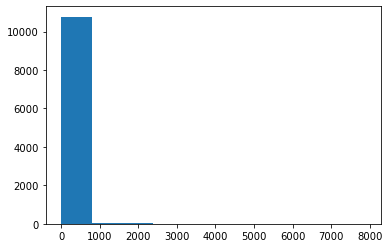

*** asm_commands_sal: 107


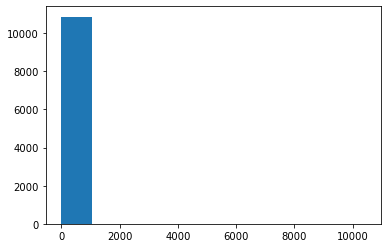

*** asm_commands_sar: 297


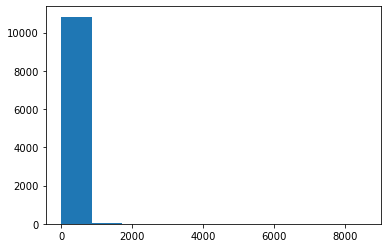

*** asm_commands_sbb: 318


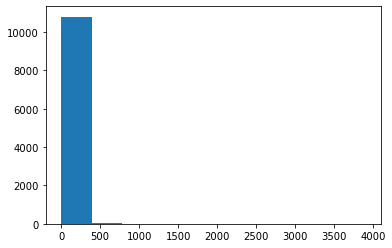

*** asm_commands_scas: 82


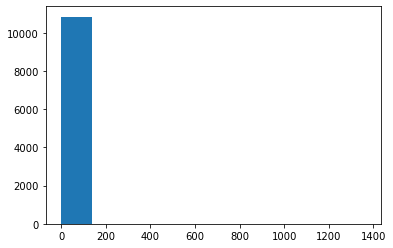

*** asm_commands_shl: 442


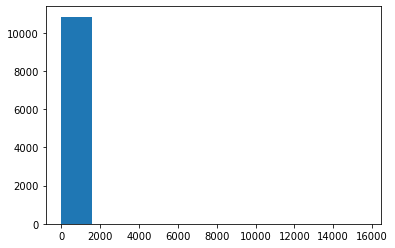

*** asm_commands_shr: 422


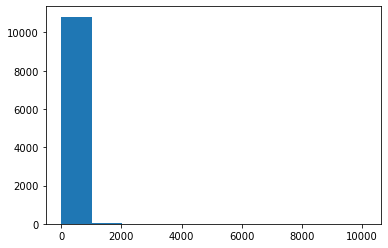

*** asm_commands_sidt: 18


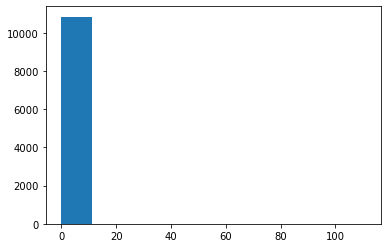

*** asm_commands_stc: 115


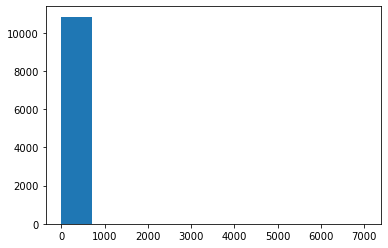

*** asm_commands_std: 855


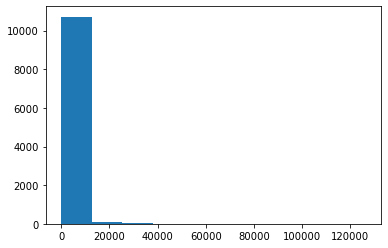

*** asm_commands_sti: 148


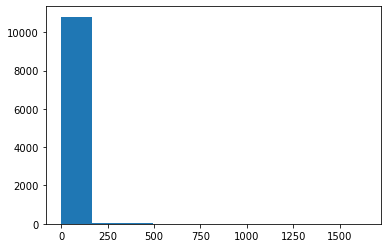

*** asm_commands_stos: 186


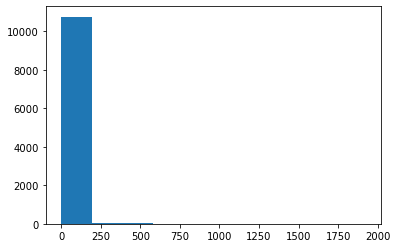

*** asm_commands_sub: 3002


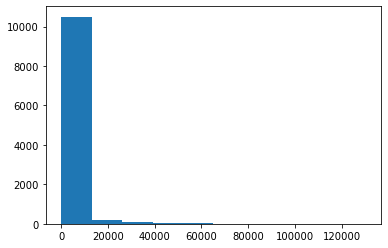

*** asm_commands_test: 1311


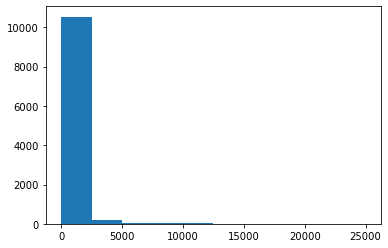

*** asm_commands_wait: 125


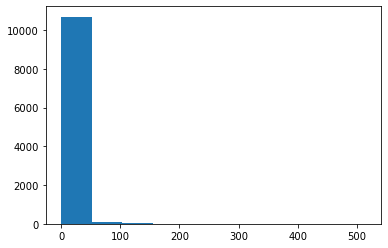

*** asm_commands_xchg: 196


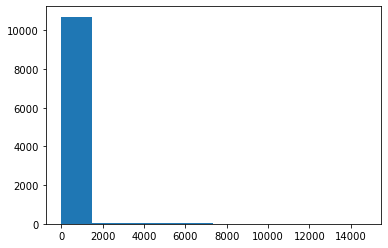

*** asm_commands_xor: 1309


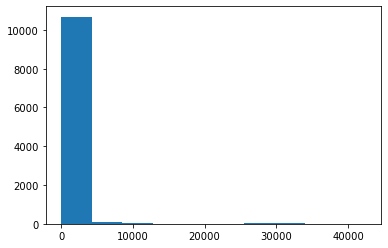

*** line_count_asm: 911


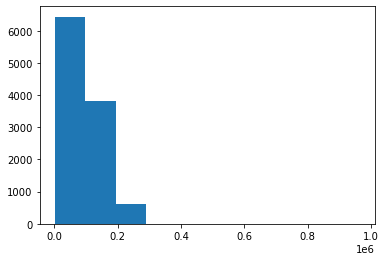

*** size_asm: 990


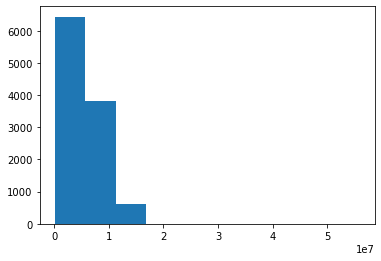

*** Class: 9


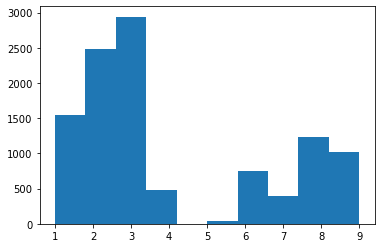

In [270]:
for col in num_columns:
    print(f'*** {col}: {df[col].nunique()}')
    plt.hist(df[col], bins=10)
    plt.show()

asm_commands_add


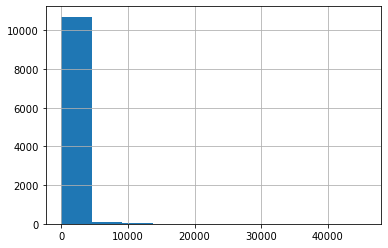


asm_commands_call


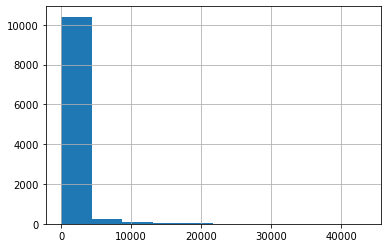


asm_commands_cdq


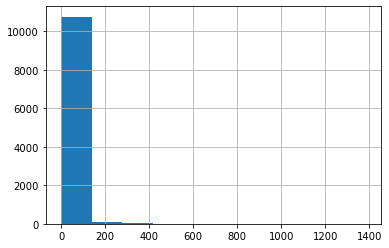


asm_commands_cld


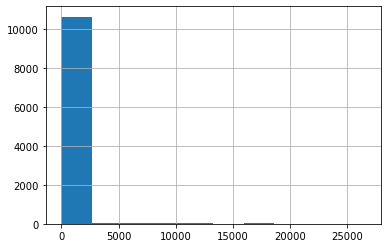


asm_commands_cli


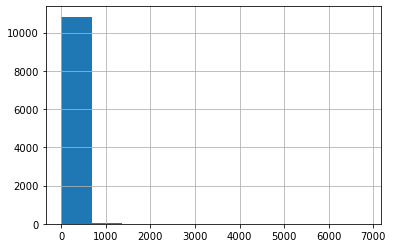


asm_commands_cmc


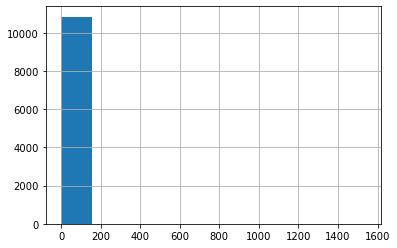


asm_commands_cmp


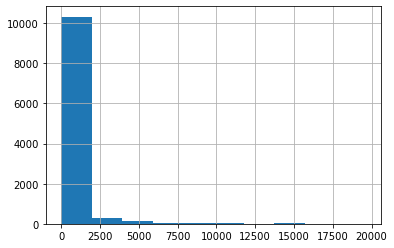


asm_commands_cwd


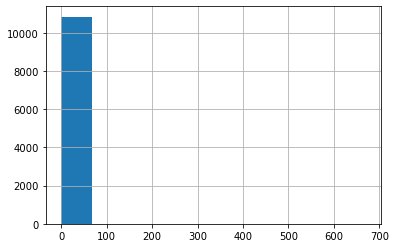


asm_commands_daa


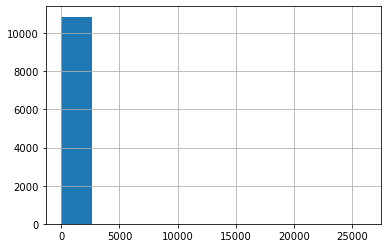


asm_commands_dd


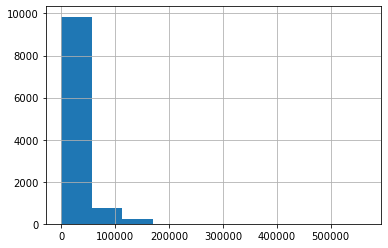


asm_commands_dec


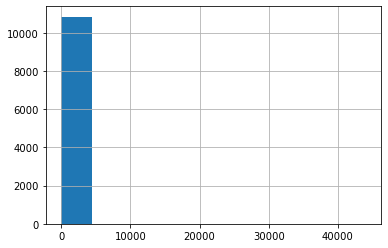


asm_commands_dw


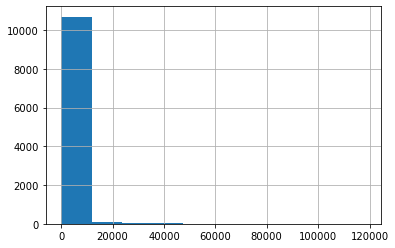


asm_commands_endp


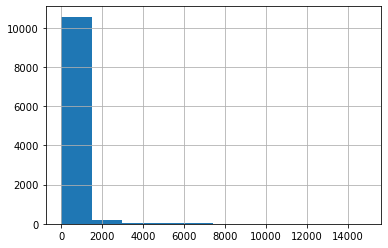


asm_commands_faddp


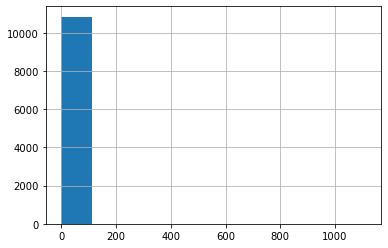


asm_commands_fchs


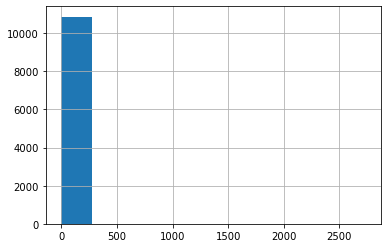


asm_commands_fdiv


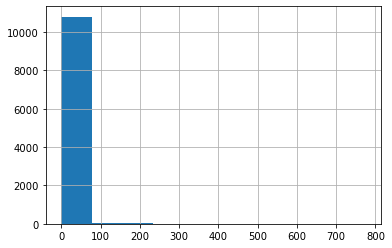


asm_commands_fdivr


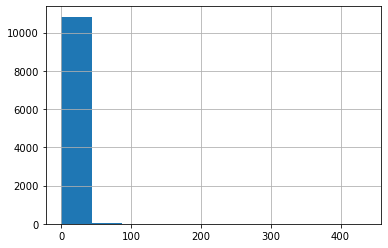


asm_commands_fistp


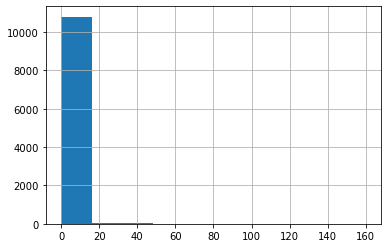


asm_commands_fld


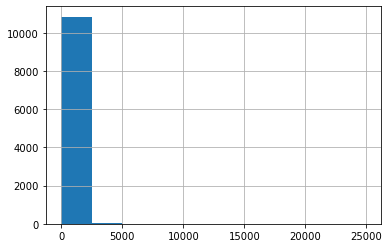


asm_commands_fstp


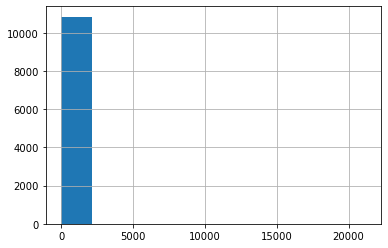


asm_commands_fword


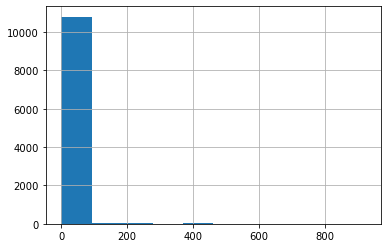


asm_commands_fxch


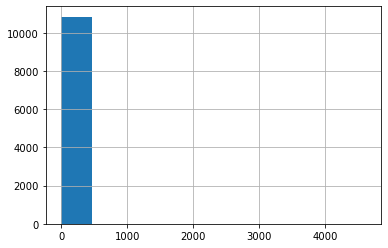


asm_commands_imul


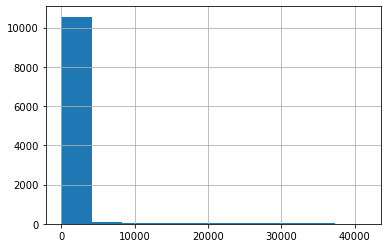


asm_commands_in


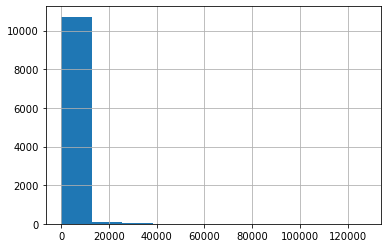


asm_commands_inc


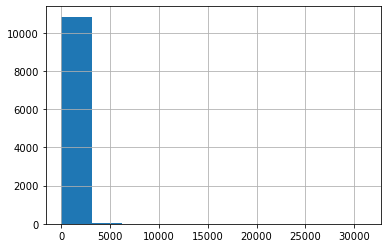


asm_commands_ins


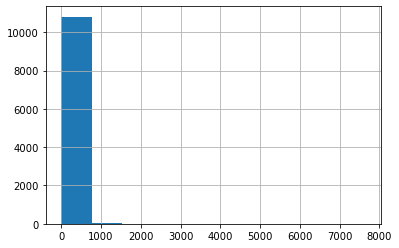


asm_commands_jb


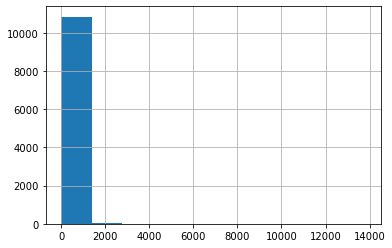


asm_commands_je


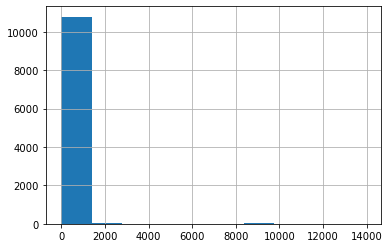


asm_commands_jg


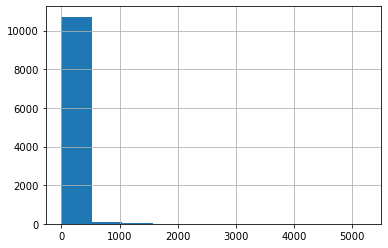


asm_commands_jl


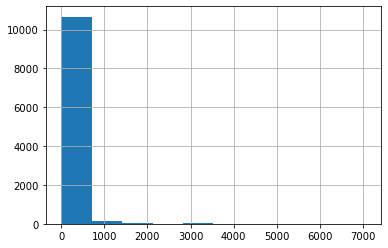


asm_commands_jmp


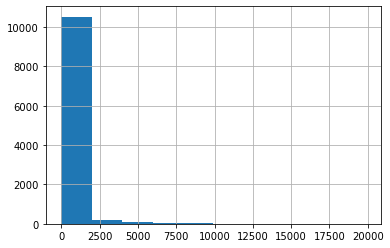


asm_commands_jnb


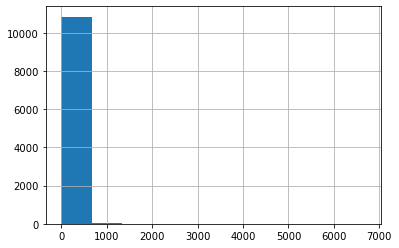


asm_commands_jno


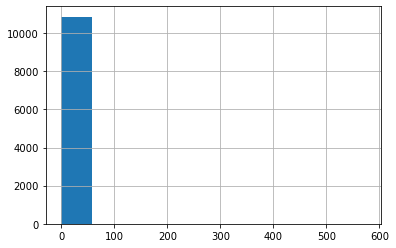


asm_commands_jo


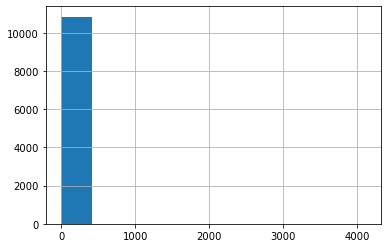


asm_commands_jz


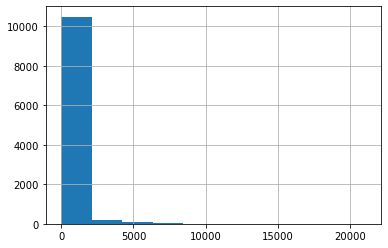


asm_commands_lea


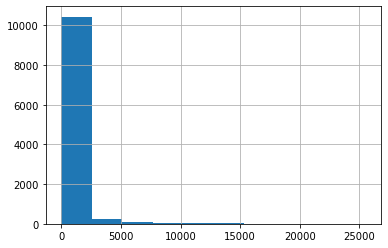


asm_commands_mov


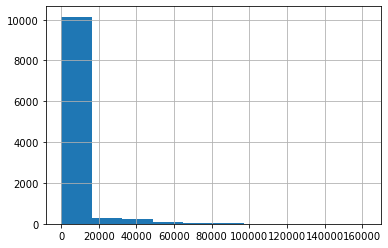


asm_commands_mul


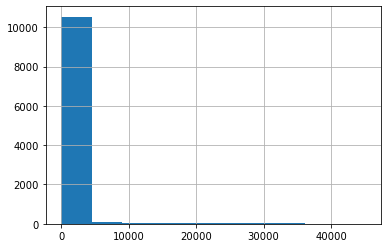


asm_commands_not


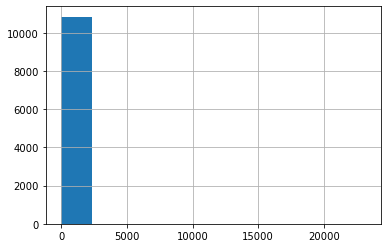


asm_commands_or


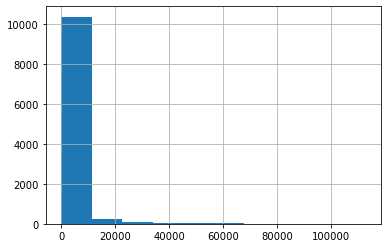


asm_commands_out


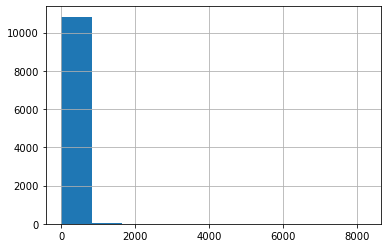


asm_commands_outs


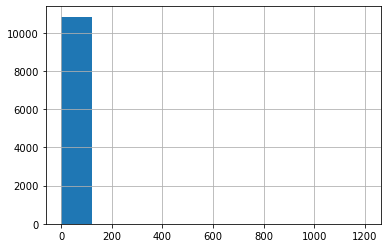


asm_commands_pop


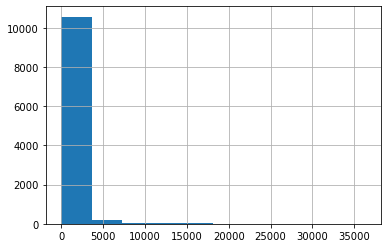


asm_commands_push


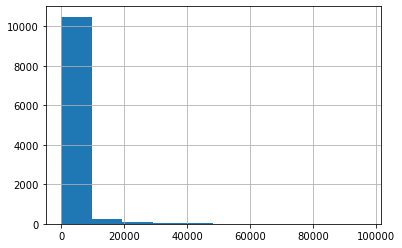


asm_commands_rcl


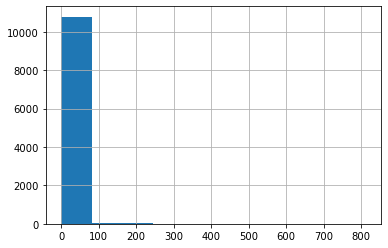


asm_commands_rcr


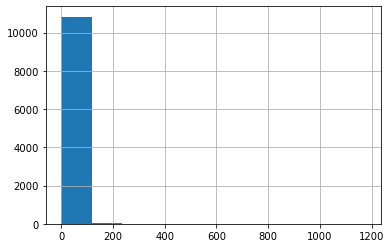


asm_commands_rep


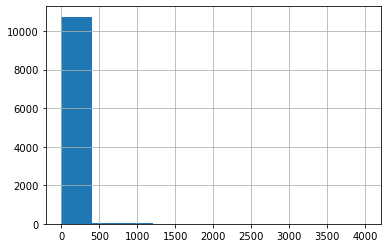


asm_commands_ret


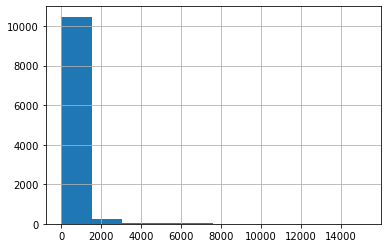


asm_commands_rol


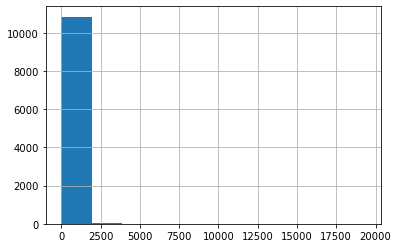


asm_commands_ror


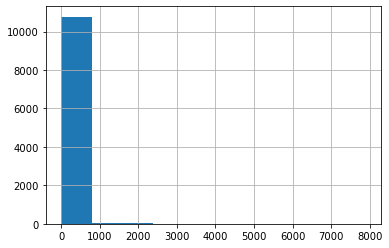


asm_commands_sal


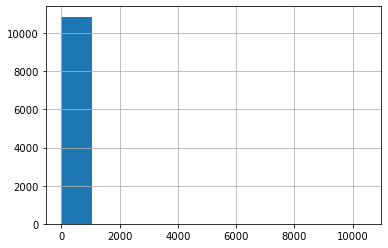


asm_commands_sar


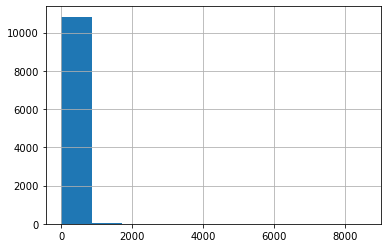


asm_commands_sbb


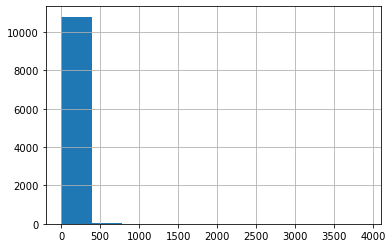


asm_commands_scas


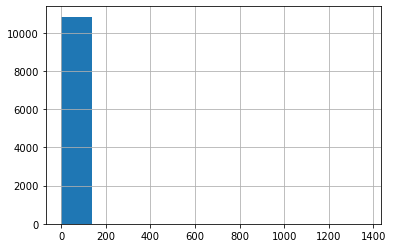


asm_commands_shl


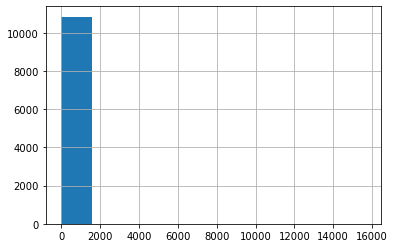


asm_commands_shr


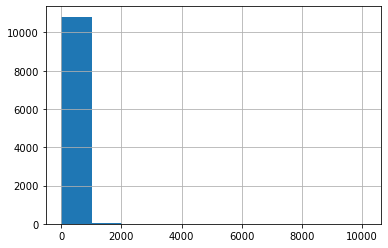


asm_commands_sidt


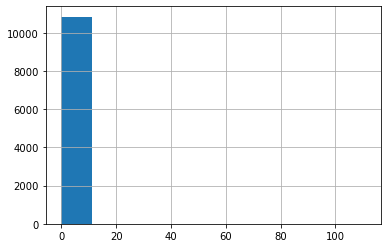


asm_commands_stc


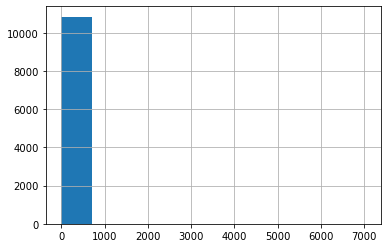


asm_commands_std


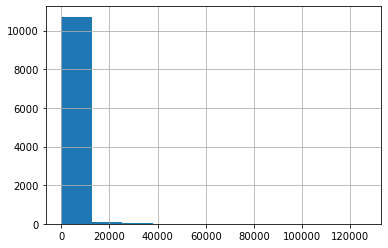


asm_commands_sti


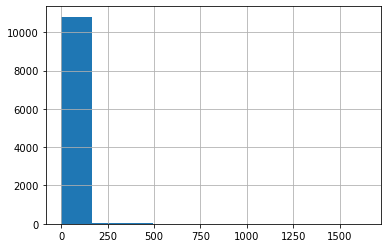


asm_commands_stos


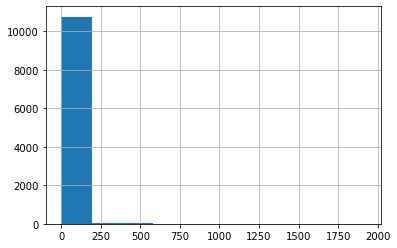


asm_commands_sub


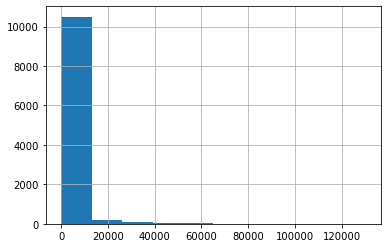


asm_commands_test


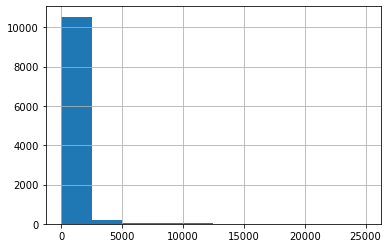


asm_commands_wait


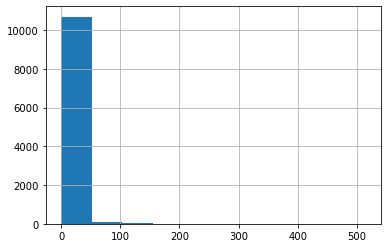


asm_commands_xchg


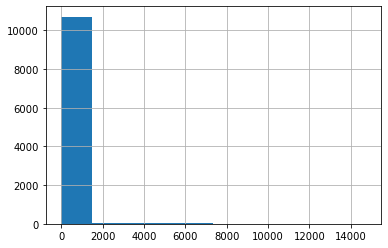


asm_commands_xor


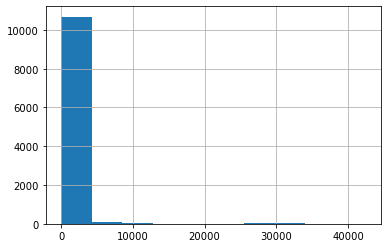


line_count_asm


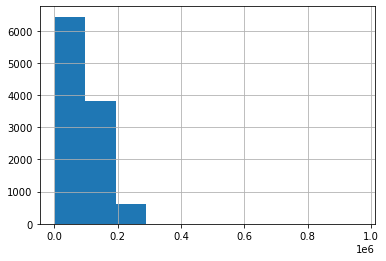


size_asm


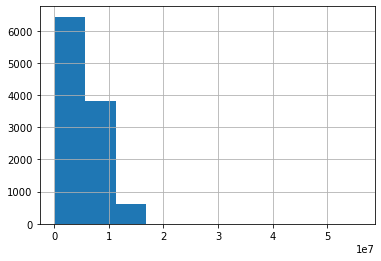


Class


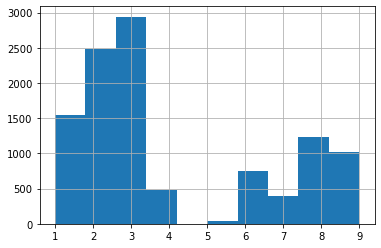

In [271]:
for col in df:
    print(col)
    df[col].hist(bins=10)
    plt.show()
    print()

I check individual statistical metrics for variables. We see a very high standard deviation, which
suggests that most of the variables are not normally distributed. Additionally, many variables although there are no missing values
consists mostly of zeros.

In [272]:
df.describe()

asm_commands_add  asm_commands_call  asm_commands_cdq  \
count      10868.000000       10868.000000      10868.000000   
mean         724.463839         958.675377         10.774384   
std         1568.276158        2891.049563         39.071261   
min            6.000000           0.000000          0.000000   
25%          140.000000         178.000000          0.000000   
50%          362.000000         261.000000          0.000000   
75%          766.000000         609.000000         16.000000   
max        45684.000000       43479.000000       1384.000000   

       asm_commands_cld  asm_commands_cli  asm_commands_cmc  asm_commands_cmp  \
count      10868.000000      10868.000000      10868.000000      10868.000000   
mean         200.203165         16.794258          1.900074        480.152742   
std         1567.778035        184.439789         35.070993       1384.428550   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          8.000000   
50%            0.000000          1.000000          0.000000        134.500000   
75%            2.000000          6.000000          0.000000        401.000000   
max        26600.000000       6830.000000       1540.000000      19617.000000   

       asm_commands_cwd  asm_commands_daa  asm_commands_dd  ...  \
count      10868.000000      10868.000000     10868.000000  ...   
mean           1.411115        221.034321     16995.688167  ...   
std           13.709346        498.249596     32916.498115  ...   
min            0.000000          0.000000        12.000000  ...   
25%            0.000000          2.000000       217.000000  ...   
50%            0.000000         37.000000      3328.500000  ...   
75%            0.000000        183.000000     18256.000000  ...   
max          670.000000      26147.000000    565024.000000  ...   

       asm_commands_sti  asm_commands_stos  asm_commands_sub  \
count      10868.000000       10868.000000      10868.000000   
mean           6.146669          15.102135       2156.040302   
std           36.775391          55.051804       6674.654957   
min            0.000000           0.000000          0.000000   
25%            0.000000           0.000000        322.000000   
50%            1.000000           1.000000        640.000000   
75%            2.000000          22.000000       1383.000000   
max         1641.000000        1924.000000     130324.000000   

       asm_commands_test  asm_commands_wait  asm_commands_xchg  \
count       10868.000000       10868.000000       10868.000000   
mean          330.867777           6.230861          71.709698   
std          1107.955680          17.015893         581.487035   
min             0.000000           0.000000           0.000000   
25%             7.000000           0.000000           0.000000   
50%            50.000000           3.000000           1.000000   
75%           188.000000           7.000000           3.000000   
max         25008.000000         515.000000       14725.000000   

       asm_commands_xor  line_count_asm      size_asm         Class  
count      10868.000000    10868.000000  1.086800e+04  10868.000000  
mean         493.072874    80667.184026  4.678640e+06      4.017851  
std         2468.536914    64475.348289  3.739570e+06      2.684621  
min            0.000000     1942.000000  1.126280e+05      1.000000  
25%           13.000000    15105.000000  8.760320e+05      2.000000  
50%           81.500000    75364.500000  4.371121e+06      3.000000  
75%          273.000000   146433.000000  8.493056e+06      6.000000  
max        42457.000000   963585.000000  5.588787e+07      9.000000  

[8 rows x 69 columns]

I divide the dataset into a test and training part. Set random seed for reproducible results. I choose the target variable accordingly.

In [273]:

seed = 7
test_size = 0.33
train, test = train_test_split(df, test_size=test_size, random_state=seed)

target_col = 'Class'
X_train, y_train = train.drop(target_col, axis=1), train[target_col]
X_test, y_test = test.drop(target_col, axis=1), test[target_col]

The data is divided into 9 unequal classes. The largest accounts for almost 30%, the smallest 0.3% of all records. This suggests using the methods of UnderSampler or OverSampler.

In [274]:
y_train.value_counts()


3    1978
2    1658
1    1047
8     818
9     652
6     507
4     324
7     268
5      29
Name: Class, dtype: int64

In [275]:
y_train.value_counts(normalize=True)

3    0.271666
2    0.227716
1    0.143799
8    0.112347
9    0.089548
6    0.069633
4    0.044499
7    0.036808
5    0.003983
Name: Class, dtype: float64

Algorithms

I test different algorithms to check which of them will best cope with the test sample.
First, we check the DummyClassifier. It does not show good results due to too many classes and too much data dispersion.

In [276]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.predict(X_train)




array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [277]:
print(dummy.score(X_test, y_test))
preds = dummy.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.2687482575968776
0.07222562596135769
0.2687482575968776
0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I check how the logistic regression will handle the data

In [278]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_train)
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.6275439085586841
0.46658996701059635
0.6275439085586841
0.5197443527225448


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


During the data analysis, it was possible to reach different orders of values for individual variables, which significantly weakens its
logistic regression results. So I'm implementing data scaling to minimize this problem

In [279]:
lr_model = make_pipeline(StandardScaler(),
                          LogisticRegression())
lr_model.fit(X_train, y_train)


lr = lr_model
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))


0.9498187900752718
0.9489303800764065
0.9498187900752718
0.9486445302502697
0.9498187900752718


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To analyze the effectiveness of the models, I will use four measures: precision_score, recall_score, f1_score, and accuracy_score.
Their high values best reflect the correctness of the model, additionally, when used together, they allow you to assess whether the algorithm is performing
does not misunderstand.
Helpfully, in the case of the best models, I will also use the confusion matrix to see what class,
the algorithm has the biggest problem.

In [280]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [281]:
y_pred_lr_train=lr.predict(X_train)
y_pred_lr_test=lr.predict(X_test)
preds = lr_model.predict(X_test)
print('Classification Report : ',classification_report(y_train,y_pred_lr_train))
print('***********')
print('Classification Report : ',classification_report(y_test,y_pred_lr_test))

Classification Report :                precision    recall  f1-score   support

           1       0.92      0.95      0.93      1047
           2       0.99      0.98      0.99      1658
           3       0.99      1.00      0.99      1978
           4       0.90      0.99      0.94       324
           5       1.00      0.24      0.39        29
           6       0.92      0.96      0.94       507
           7       0.92      0.95      0.94       268
           8       0.96      0.91      0.93       818
           9       0.97      0.93      0.95       652

    accuracy                           0.96      7281
   macro avg       0.95      0.88      0.89      7281
weighted avg       0.96      0.96      0.96      7281

***********
Classification Report :                precision    recall  f1-score   support

           1       0.90      0.89      0.89       494
           2       0.98      0.98      0.98       820
           3       0.99      1.00      1.00       964
           4    

In [282]:
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred_lr_test))

Confusion Matrix :  [[438  10   0  10   1   4   3  21   7]
 [ 14 804   1   0   0   0   0   1   0]
 [  0   0 964   0   0   0   0   0   0]
 [  0   0   0 151   0   0   0   0   0]
 [  0   0   6   0   1   1   0   5   0]
 [  2   2   1   8   0 229   2   0   0]
 [  1   1   0   2   0   0 124   0   2]
 [ 27   2   0   7   0   3   3 366   2]
 [  6   2   0   0   1  21   0   1 330]]


The use of cross-validation will be an additional safeguard if the algorithm adapts too well to the data.
it will also help to avoid errors caused by inappropriate randomization of data into the test and training sets.

In [283]:
from sklearn.model_selection import cross_val_score
cs = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=10)
cs.mean()


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.8847689518985815

We have already checked how linear regression fared, now let's see how they will cope with the classification problem
individual algorithms: RandomForestClassifier, DecisionTreeClassifier, XGBClassifier, SVC.

In [284]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test, y_test))
preds = rf_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9882910510175634
0.988607022591111
0.9882910510175634
0.9883101903695858


In [285]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(dt_model.score(X_test, y_test))
preds = dt_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9693337050459995
0.969183421579634
0.9693337050459995
0.9691287285237202


In [286]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.988848620016727
0.9890504737353839
0.988848620016727
0.9888614907343504


In [287]:

cross_val_score(xgb_model, X_train,y_train, cv=10).mean()

0.9873652753282383

In [288]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))
preds = svc_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.5054362977418455
0.4116543275700344
0.5054362977418455
0.4446297129115361


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Like linear regressions, the SVC algorithm should be used on scaled data.

In [289]:
svr_model = make_pipeline(StandardScaler(),
                          SVC(random_state=42))
svr_model.fit(X_train, y_train)
print(svr_model.score(X_test, y_test))
preds = svr_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9372734875940898
0.9363701083493202
0.9372734875940898
0.93568425541853


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So we can see that using the default parameters we can indicate that XGBClassifier works best
and RandomForestClassifier, and the worst SVC.

I am now checking how the results of individual algorithms will be affected by changes in class weights. However, this is not an optimal solution
to type it manually, so for automation, I'm closing it in a loop. Given the number of parameters we have in
For individual algorithms, however, it will be better to use ready-made functions such as RandomizedSearchCV and GridSearchCV

In [290]:
weights = [2, 5, 10, 20, 30, 50]

for w in weights:
    lr = LogisticRegression(class_weight={1:10, 1:w})
    lr.fit(X_train, y_train)
    
    preds = lr.predict(X_test)
    print(w)
    print(precision_score(y_test, preds, average='weighted'))
    print(recall_score(y_test, preds, average='weighted'))
    print(f1_score(y_test, preds, average='weighted'))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
0.4651126079605173
0.6275439085586841
0.5187150402618361


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5
0.4050416925139195
0.5695567326456649
0.4664729256751041


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10
0.41707373926405467
0.5508781711736828
0.4610496543800578


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20
0.39870224039599017
0.5296905492054642
0.4378070288647354


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30
0.40317641647210084
0.5280178422079732
0.4386653649536582
50
0.40158080704751375
0.520490660719264
0.4328238215083062


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
%%time
for w in weights:
    dt = DecisionTreeClassifier(class_weight={1:10, 1:w})
    dt.fit(X_train, y_train)
    
    preds = dt.predict(X_test)
    print(w)
    print(precision_score(y_test, preds, average='weighted'))
    print(recall_score(y_test, preds, average='weighted'))
    print(f1_score(y_test, preds, average='weighted'))

2
0.9661223477121677
0.9657095065514357
0.9658004740109127
5
0.9673994410423709
0.9673822135489267
0.9673003240704352
10
0.9691924089250185
0.9693337050459995
0.9692359247197968
20
0.9675294519208062
0.9673822135489267
0.9673959554122687
30
0.9667160572219442
0.9665458600501812
0.966521460454042
50
0.9636069919416542
0.9634792305547811
0.9633697258254983
Wall time: 1.42 s


On the occasion of working with tree algorithms, he visualizes on a graph what the division of data may look like.

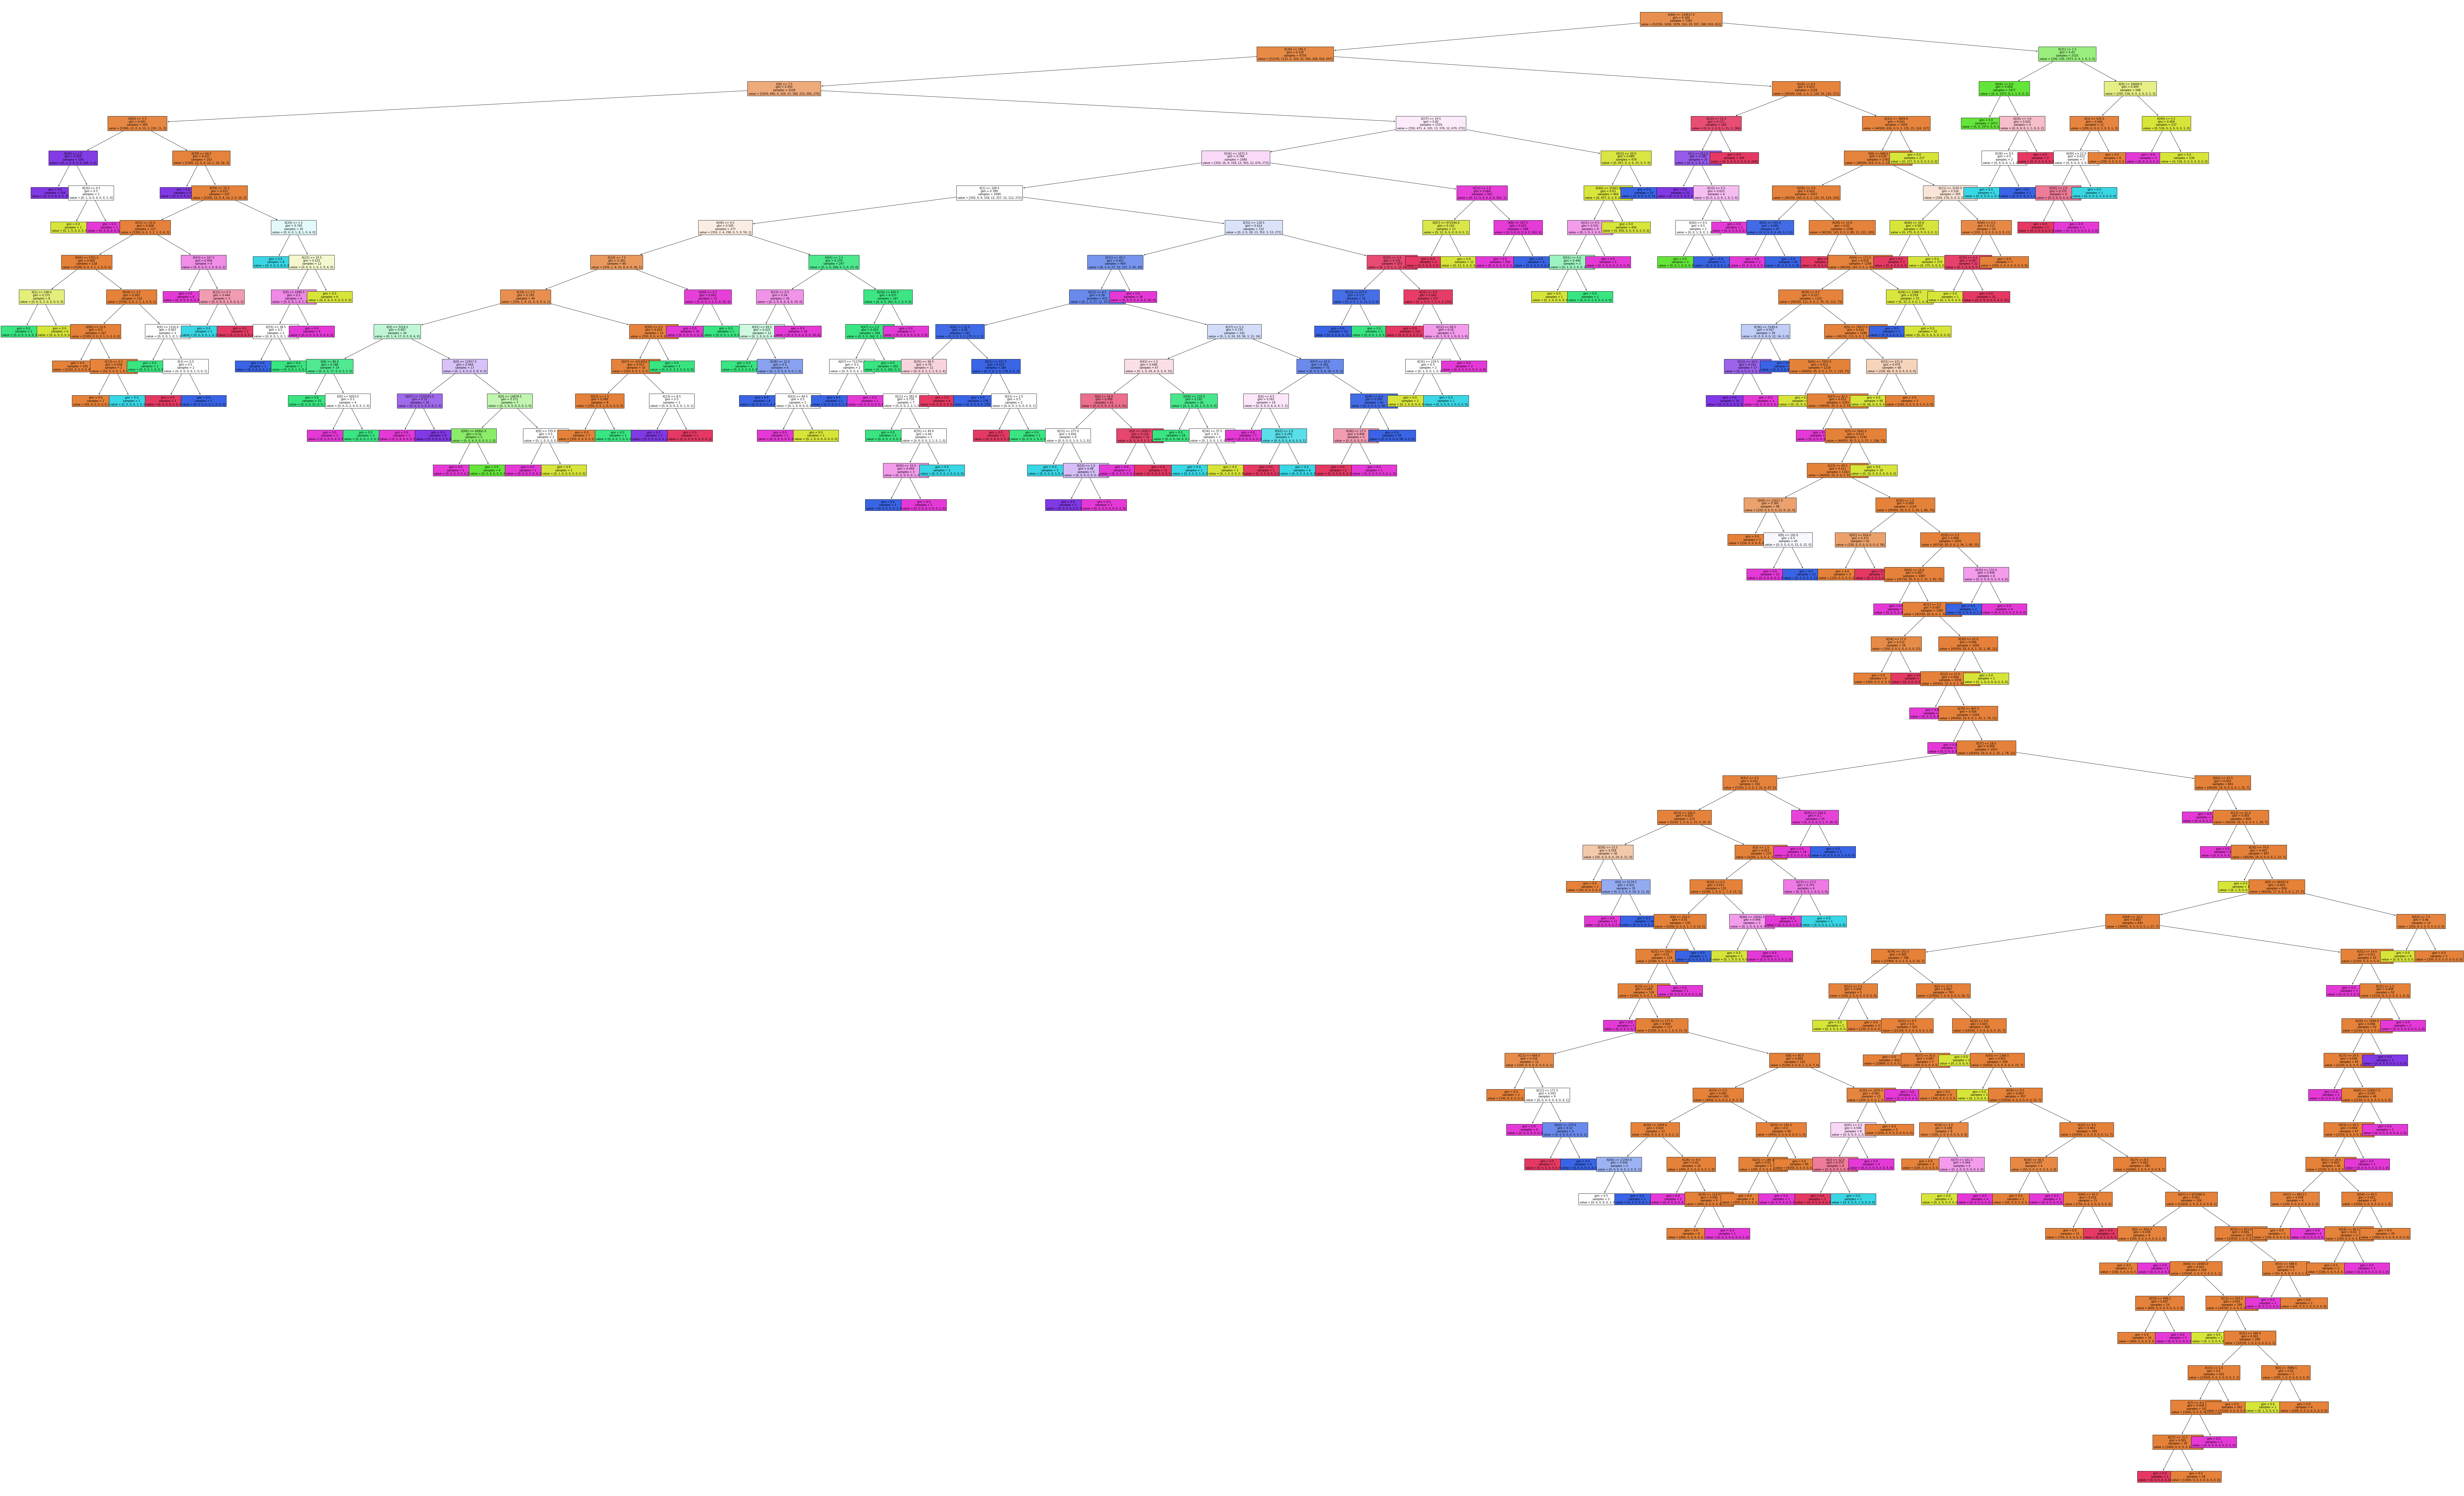

In [292]:
import sklearn
from sklearn.tree import plot_tree
plt.figure(figsize=(160,100))  
plot_tree(dt, fontsize=10, filled=True)  
plt.show()

In [293]:
dt.tree_.max_depth

42

In [294]:
%%time
xgb = XGBClassifier()
params = {"n_estimators":[10,100,200],
         "learning_rate":ss.uniform(0.01,0.3),
          "max_depth": ss.randint(5,30),
         "min_child_weight":ss.randint(5,50),
         "reg_lambda":ss.uniform(0.1,3)}

cv = RandomizedSearchCV(cv=3, 
                        estimator=xgb,
                        param_distributions=params,
                        n_iter=10,
                        verbose=100)
cv.fit(X_train, y_train)

print(cv.score(X_test, y_test))
preds = cv.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

print(classification_report(y_test, preds))
print('Confusion Matrix : ',confusion_matrix(y_test,preds))
print(cross_val_score(cv, X_train,y_train, cv=10).mean())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 1/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.984 total time=  15.5s
[CV 2/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 2/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.988 total time=  17.1s
[CV 3/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 3/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.991 total time=  20.2s
[CV 1/3; 2/10] START lea

[CV 1/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.960 total time=  17.9s
[CV 2/3; 10/10] START learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807
[CV 2/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.968 total time=  16.3s
[CV 3/3; 10/10] START learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807
[CV 3/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.963 total time=  15.7s
0.9885698355171453
0.9887321425543836
0.9885698355171453
0.988581965270927
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       494
           2      

[CV 3/3; 7/10] END learning_rate=0.05450209365582287, max_depth=7, min_child_weight=32, n_estimators=200, reg_lambda=0.7442692661772868;, score=0.984 total time=  17.6s
[CV 1/3; 8/10] START learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estimators=10, reg_lambda=1.2588107543147333
[CV 1/3; 8/10] END learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estimators=10, reg_lambda=1.2588107543147333;, score=0.977 total time=   1.5s
[CV 2/3; 8/10] START learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estimators=10, reg_lambda=1.2588107543147333
[CV 2/3; 8/10] END learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estimators=10, reg_lambda=1.2588107543147333;, score=0.978 total time=   1.3s
[CV 3/3; 8/10] START learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estimators=10, reg_lambda=1.2588107543147333
[CV 3/3; 8/10] END learning_rate=0.3006144514490772, max_depth=6, min_child_weight=9, n_estima

[CV 3/3; 6/10] END learning_rate=0.2627308301578374, max_depth=10, min_child_weight=49, n_estimators=10, reg_lambda=0.43201899156787105;, score=0.952 total time=   1.1s
[CV 1/3; 7/10] START learning_rate=0.08152527714182813, max_depth=25, min_child_weight=28, n_estimators=200, reg_lambda=2.4671013443137917
[CV 1/3; 7/10] END learning_rate=0.08152527714182813, max_depth=25, min_child_weight=28, n_estimators=200, reg_lambda=2.4671013443137917;, score=0.984 total time=  16.8s
[CV 2/3; 7/10] START learning_rate=0.08152527714182813, max_depth=25, min_child_weight=28, n_estimators=200, reg_lambda=2.4671013443137917
[CV 2/3; 7/10] END learning_rate=0.08152527714182813, max_depth=25, min_child_weight=28, n_estimators=200, reg_lambda=2.4671013443137917;, score=0.982 total time=  16.1s
[CV 3/3; 7/10] START learning_rate=0.08152527714182813, max_depth=25, min_child_weight=28, n_estimators=200, reg_lambda=2.4671013443137917
[CV 3/3; 7/10] END learning_rate=0.08152527714182813, max_depth=25, min_ch

[CV 3/3; 5/10] END learning_rate=0.2537866881080129, max_depth=24, min_child_weight=9, n_estimators=100, reg_lambda=1.7822708617513547;, score=0.989 total time=   8.6s
[CV 1/3; 6/10] START learning_rate=0.14463109278908656, max_depth=21, min_child_weight=5, n_estimators=10, reg_lambda=2.9413714463986516
[CV 1/3; 6/10] END learning_rate=0.14463109278908656, max_depth=21, min_child_weight=5, n_estimators=10, reg_lambda=2.9413714463986516;, score=0.973 total time=   2.5s
[CV 2/3; 6/10] START learning_rate=0.14463109278908656, max_depth=21, min_child_weight=5, n_estimators=10, reg_lambda=2.9413714463986516
[CV 2/3; 6/10] END learning_rate=0.14463109278908656, max_depth=21, min_child_weight=5, n_estimators=10, reg_lambda=2.9413714463986516;, score=0.978 total time=   2.0s
[CV 3/3; 6/10] START learning_rate=0.14463109278908656, max_depth=21, min_child_weight=5, n_estimators=10, reg_lambda=2.9413714463986516
[CV 3/3; 6/10] END learning_rate=0.14463109278908656, max_depth=21, min_child_weight=

[CV 3/3; 4/10] END learning_rate=0.13087832201563726, max_depth=5, min_child_weight=45, n_estimators=10, reg_lambda=0.6711878447612405;, score=0.947 total time=   1.1s
[CV 1/3; 5/10] START learning_rate=0.24605035975919481, max_depth=25, min_child_weight=39, n_estimators=200, reg_lambda=0.6944604623936412
[CV 1/3; 5/10] END learning_rate=0.24605035975919481, max_depth=25, min_child_weight=39, n_estimators=200, reg_lambda=0.6944604623936412;, score=0.978 total time=  12.0s
[CV 2/3; 5/10] START learning_rate=0.24605035975919481, max_depth=25, min_child_weight=39, n_estimators=200, reg_lambda=0.6944604623936412
[CV 2/3; 5/10] END learning_rate=0.24605035975919481, max_depth=25, min_child_weight=39, n_estimators=200, reg_lambda=0.6944604623936412;, score=0.982 total time=  12.1s
[CV 3/3; 5/10] START learning_rate=0.24605035975919481, max_depth=25, min_child_weight=39, n_estimators=200, reg_lambda=0.6944604623936412
[CV 3/3; 5/10] END learning_rate=0.24605035975919481, max_depth=25, min_chi

[CV 3/3; 3/10] END learning_rate=0.05073797133741392, max_depth=9, min_child_weight=29, n_estimators=100, reg_lambda=0.9142382827365411;, score=0.980 total time=  12.0s
[CV 1/3; 4/10] START learning_rate=0.18813833920332737, max_depth=15, min_child_weight=36, n_estimators=200, reg_lambda=2.1221126050988213
[CV 1/3; 4/10] END learning_rate=0.18813833920332737, max_depth=15, min_child_weight=36, n_estimators=200, reg_lambda=2.1221126050988213;, score=0.977 total time=  13.5s
[CV 2/3; 4/10] START learning_rate=0.18813833920332737, max_depth=15, min_child_weight=36, n_estimators=200, reg_lambda=2.1221126050988213
[CV 2/3; 4/10] END learning_rate=0.18813833920332737, max_depth=15, min_child_weight=36, n_estimators=200, reg_lambda=2.1221126050988213;, score=0.987 total time=  13.7s
[CV 3/3; 4/10] START learning_rate=0.18813833920332737, max_depth=15, min_child_weight=36, n_estimators=200, reg_lambda=2.1221126050988213
[CV 3/3; 4/10] END learning_rate=0.18813833920332737, max_depth=15, min_ch

[CV 3/3; 2/10] END learning_rate=0.21590255412006032, max_depth=5, min_child_weight=8, n_estimators=100, reg_lambda=1.1112511071042266;, score=0.991 total time=   9.2s
[CV 1/3; 3/10] START learning_rate=0.23318351803649182, max_depth=6, min_child_weight=38, n_estimators=100, reg_lambda=1.492603630046284
[CV 1/3; 3/10] END learning_rate=0.23318351803649182, max_depth=6, min_child_weight=38, n_estimators=100, reg_lambda=1.492603630046284;, score=0.976 total time=   7.3s
[CV 2/3; 3/10] START learning_rate=0.23318351803649182, max_depth=6, min_child_weight=38, n_estimators=100, reg_lambda=1.492603630046284
[CV 2/3; 3/10] END learning_rate=0.23318351803649182, max_depth=6, min_child_weight=38, n_estimators=100, reg_lambda=1.492603630046284;, score=0.988 total time=   7.3s
[CV 3/3; 3/10] START learning_rate=0.23318351803649182, max_depth=6, min_child_weight=38, n_estimators=100, reg_lambda=1.492603630046284
[CV 3/3; 3/10] END learning_rate=0.23318351803649182, max_depth=6, min_child_weight=3

[CV 3/3; 1/10] END learning_rate=0.12776824724502467, max_depth=26, min_child_weight=21, n_estimators=100, reg_lambda=2.931952855304966;, score=0.988 total time=   9.0s
[CV 1/3; 2/10] START learning_rate=0.048437906663454856, max_depth=15, min_child_weight=38, n_estimators=200, reg_lambda=2.2623110423528736
[CV 1/3; 2/10] END learning_rate=0.048437906663454856, max_depth=15, min_child_weight=38, n_estimators=200, reg_lambda=2.2623110423528736;, score=0.976 total time=  16.5s
[CV 2/3; 2/10] START learning_rate=0.048437906663454856, max_depth=15, min_child_weight=38, n_estimators=200, reg_lambda=2.2623110423528736
[CV 2/3; 2/10] END learning_rate=0.048437906663454856, max_depth=15, min_child_weight=38, n_estimators=200, reg_lambda=2.2623110423528736;, score=0.982 total time=  17.2s
[CV 3/3; 2/10] START learning_rate=0.048437906663454856, max_depth=15, min_child_weight=38, n_estimators=200, reg_lambda=2.2623110423528736
[CV 3/3; 2/10] END learning_rate=0.048437906663454856, max_depth=15, 

[CV 3/3; 10/10] END learning_rate=0.24391786364856832, max_depth=6, min_child_weight=29, n_estimators=10, reg_lambda=0.8658050857669718;, score=0.964 total time=   1.3s
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.26302872098583474, max_depth=24, min_child_weight=31, n_estimators=100, reg_lambda=1.7599048255337517
[CV 1/3; 1/10] END learning_rate=0.26302872098583474, max_depth=24, min_child_weight=31, n_estimators=100, reg_lambda=1.7599048255337517;, score=0.977 total time=   6.6s
[CV 2/3; 1/10] START learning_rate=0.26302872098583474, max_depth=24, min_child_weight=31, n_estimators=100, reg_lambda=1.7599048255337517
[CV 2/3; 1/10] END learning_rate=0.26302872098583474, max_depth=24, min_child_weight=31, n_estimators=100, reg_lambda=1.7599048255337517;, score=0.986 total time=   6.7s
[CV 3/3; 1/10] START learning_rate=0.26302872098583474, max_depth=24, min_child_weight=31, n_estimators=100, reg_lambda=1.7599048255337517
[CV 3/3; 1/10

[CV 3/3; 9/10] END learning_rate=0.16193372936699316, max_depth=19, min_child_weight=36, n_estimators=100, reg_lambda=2.62620934802011;, score=0.981 total time=   7.4s
[CV 1/3; 10/10] START learning_rate=0.28542277845545966, max_depth=26, min_child_weight=17, n_estimators=10, reg_lambda=2.8884078145282337
[CV 1/3; 10/10] END learning_rate=0.28542277845545966, max_depth=26, min_child_weight=17, n_estimators=10, reg_lambda=2.8884078145282337;, score=0.969 total time=   1.2s
[CV 2/3; 10/10] START learning_rate=0.28542277845545966, max_depth=26, min_child_weight=17, n_estimators=10, reg_lambda=2.8884078145282337
[CV 2/3; 10/10] END learning_rate=0.28542277845545966, max_depth=26, min_child_weight=17, n_estimators=10, reg_lambda=2.8884078145282337;, score=0.977 total time=   1.2s
[CV 3/3; 10/10] START learning_rate=0.28542277845545966, max_depth=26, min_child_weight=17, n_estimators=10, reg_lambda=2.8884078145282337
[CV 3/3; 10/10] END learning_rate=0.28542277845545966, max_depth=26, min_ch

[CV 3/3; 8/10] END learning_rate=0.30504127912429324, max_depth=8, min_child_weight=15, n_estimators=200, reg_lambda=1.9177080827811788;, score=0.991 total time=  12.6s
[CV 1/3; 9/10] START learning_rate=0.2086515068976536, max_depth=25, min_child_weight=17, n_estimators=100, reg_lambda=0.2372610491565326
[CV 1/3; 9/10] END learning_rate=0.2086515068976536, max_depth=25, min_child_weight=17, n_estimators=100, reg_lambda=0.2372610491565326;, score=0.983 total time=   7.6s
[CV 2/3; 9/10] START learning_rate=0.2086515068976536, max_depth=25, min_child_weight=17, n_estimators=100, reg_lambda=0.2372610491565326
[CV 2/3; 9/10] END learning_rate=0.2086515068976536, max_depth=25, min_child_weight=17, n_estimators=100, reg_lambda=0.2372610491565326;, score=0.988 total time=   7.8s
[CV 3/3; 9/10] START learning_rate=0.2086515068976536, max_depth=25, min_child_weight=17, n_estimators=100, reg_lambda=0.2372610491565326
[CV 3/3; 9/10] END learning_rate=0.2086515068976536, max_depth=25, min_child_we

[CV 3/3; 7/10] END learning_rate=0.09628510929264172, max_depth=7, min_child_weight=45, n_estimators=100, reg_lambda=1.811479557992651;, score=0.974 total time=   8.1s
[CV 1/3; 8/10] START learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n_estimators=10, reg_lambda=2.47216797142169
[CV 1/3; 8/10] END learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n_estimators=10, reg_lambda=2.47216797142169;, score=0.954 total time=   1.2s
[CV 2/3; 8/10] START learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n_estimators=10, reg_lambda=2.47216797142169
[CV 2/3; 8/10] END learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n_estimators=10, reg_lambda=2.47216797142169;, score=0.956 total time=   1.3s
[CV 3/3; 8/10] START learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n_estimators=10, reg_lambda=2.47216797142169
[CV 3/3; 8/10] END learning_rate=0.10759163401266014, max_depth=21, min_child_weight=19, n

I see the algorithms have the highest percentage error with class 5 being the least.
I carry out an analysis of the number of classes. I see a big difference between it
the majority class and the minority class. So I introduce methods to minimize the differences and improve the performance of the algorithm.

In [299]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [300]:
y_train.value_counts()

3    1978
2    1658
1    1047
8     818
9     652
6     507
4     324
7     268
5      29
Name: Class, dtype: int64

In [301]:
y_train.value_counts(normalize=True)

3    0.271666
2    0.227716
1    0.143799
8    0.112347
9    0.089548
6    0.069633
4    0.044499
7    0.036808
5    0.003983
Name: Class, dtype: float64

Tests the effects of hanging and downsampling on algorithms that performed best
yourself in the early part of the project.

In [302]:
rus = RandomUnderSampler(random_state=42) 
X_res, y_res = rus.fit_resample(X_train, y_train)

In [303]:
X_res.shape, y_res.shape

((261, 68), (261,))

In [304]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9188737106216894
precision_score: 0.9297098479330889
recall_score: 0.9188737106216894
f1_score: 0.9204749039272421
XGBClassifier
score: 0.9188737106216894
precision_score: 0.9272049491273665
recall_score: 0.9188737106216894
f1_score: 0.920101848592224


In [305]:
rus = RandomUnderSampler(sampling_strategy='not majority')
X_res, y_res = rus.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9459158070811263
precision_score: 0.9500888761378673
recall_score: 0.9459158070811263
f1_score: 0.9465541610818542
XGBClassifier
score: 0.9408976860886534
precision_score: 0.943034999587046
recall_score: 0.9408976860886534
f1_score: 0.9412721033752487


In [306]:
from imblearn.under_sampling import TomekLinks

In [307]:
tl = TomekLinks(sampling_strategy='all', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9866183440200725
precision_score: 0.9870137423424961
recall_score: 0.9866183440200725
f1_score: 0.9866459691591912
XGBClassifier
score: 0.9868971285196543
precision_score: 0.9872617993025113
recall_score: 0.9868971285196543
f1_score: 0.9869322718371841


In individual measures, I check the difference between the sampled set and the training set

In [308]:
X_train.shape

(7281, 68)

In [309]:
X_res.shape

(7131, 68)

In [310]:
removed = X_train.shape[0] - X_res.shape[0]
removed

150

In [311]:
tl = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9868971285196543
precision_score: 0.9873108959096434
recall_score: 0.9868971285196543
f1_score: 0.9869153724327775
XGBClassifier
score: 0.9871759130192361
precision_score: 0.9876105230194038
recall_score: 0.9871759130192361
f1_score: 0.9872136661743843


In [312]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9894061890158907
precision_score: 0.989614709181824
recall_score: 0.9894061890158907
f1_score: 0.9894065293813126
XGBClassifier
score: 0.9877334820183997
precision_score: 0.9880828623119433
recall_score: 0.9877334820183997
f1_score: 0.9877551576214562


In [313]:
X_res.shape, X_train.shape

((17802, 68), (7281, 68))

In [314]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.988848620016727
precision_score: 0.9890797923043418
recall_score: 0.988848620016727
f1_score: 0.9888706509730057
XGBClassifier
score: 0.9871759130192361
precision_score: 0.987396826209728
recall_score: 0.9871759130192361
f1_score: 0.9871893149456602


In [315]:
X_res.shape

(17802, 68)

In [316]:

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', n_jobs=-1)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.988848620016727
precision_score: 0.9889728027073551
recall_score: 0.988848620016727
f1_score: 0.9888623381923938
XGBClassifier
score: 0.9852244215221634
precision_score: 0.9854354374014255
recall_score: 0.9852244215221634
f1_score: 0.9852665408707589


In [317]:
%%time
from imblearn.combine import SMOTETomek

smt = SMOTETomek(n_jobs=-1)

X_res, y_res = smt.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9894061890158907
precision_score: 0.9896454858887245
recall_score: 0.9894061890158907
f1_score: 0.9894233677624357
XGBClassifier
score: 0.9877334820183997
precision_score: 0.9879948106653317
recall_score: 0.9877334820183997
f1_score: 0.9877519714791165
Wall time: 1min


In [318]:
sm = SMOTE()
tl = TomekLinks()

smtl = SMOTETomek(smote=sm, tomek=tl, n_jobs=-1)

X_res, y_res = smtl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

RandomForestClassifier
score: 0.9880122665179816
precision_score: 0.9882641547307017
recall_score: 0.9880122665179816
f1_score: 0.9880226755057079
XGBClassifier
score: 0.9855032060217452
precision_score: 0.9858064484773199
recall_score: 0.9855032060217452
f1_score: 0.9855268066653831


In [319]:
%%time
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import MinMaxScaler
ratios = [0.5, 0.33, 0.25, 0.2]
for ratio in ratios:
    print(f"Ratio: {ratio}")
    sm = SMOTENC(categorical_features = [1,2,3,4,5,6,7,8,9],sampling_strategy='minority', n_jobs=-1)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_res_final = pd.get_dummies(X_res)
    
    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    lr = LogisticRegression()
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_res_final)
    X_test_scaled = scaler.transform(pd.get_dummies(X_test))
    
    # train
    rf.fit(X_train_scaled, y_res)
    dt.fit(X_train_scaled, y_res)
    lr.fit(X_train_scaled, y_res)
    
    # predict
    preds_lr = lr.predict(X_test_scaled)
    preds_rf = rf.predict(X_test_scaled)
    preds_dt = dt.predict(X_test_scaled)
    
    # metrics 
    print(f"LR: {round(f1_score(y_test, preds_lr, average='weighted'), 3)}, {round(precision_score(y_test, preds_lr, average='weighted'), 3)}")
    print(f"RF: {round(f1_score(y_test, preds_rf, average='weighted'), 3)}, {round(precision_score(y_test, preds_rf, average='weighted'), 3)}")
    print(f"DT: {round(f1_score(y_test, preds_dt, average='weighted'), 3)}, {round(precision_score(y_test, preds_dt, average='weighted'), 3)}")

Ratio: 0.5


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR: 0.694, 0.763
RF: 0.99, 0.99
DT: 0.97, 0.971
Ratio: 0.33


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR: 0.694, 0.763
RF: 0.989, 0.989
DT: 0.972, 0.972
Ratio: 0.25


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR: 0.694, 0.763
RF: 0.988, 0.988
DT: 0.975, 0.975
Ratio: 0.2
LR: 0.695, 0.763
RF: 0.989, 0.989
DT: 0.972, 0.973
Wall time: 19.2 s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I use the voting method to increase the effectiveness of tree algorithms.

In [320]:
from sklearn.ensemble import BaggingClassifier

In [321]:
clf = BaggingClassifier(DecisionTreeClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=500)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("BaggingClassifier")
print("score:", clf.score(X_test, y_test))
preds = clf.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))
print(classification_report(y_test, pred))

BaggingClassifier
score: 0.9885698355171453
precision_score: 0.988806381655853
recall_score: 0.9885698355171453
f1_score: 0.9885783789711032
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       494
           2       1.00      0.99      1.00       820
           3       1.00      1.00      1.00       964
           4       0.96      1.00      0.98       151
           5       1.00      0.92      0.96        13
           6       0.97      0.98      0.97       244
           7       1.00      0.99      1.00       130
           8       0.99      0.95      0.97       410
           9       1.00      0.99      0.99       361

    accuracy                           0.99      3587
   macro avg       0.99      0.98      0.98      3587
weighted avg       0.99      0.99      0.99      3587



It plots the data on a graph to check which parameters will be best for the model

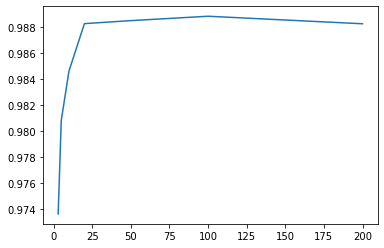

In [322]:
scores = []
N = [3,5,10,20,50,100,200]
for n in N:
    clf = BaggingClassifier(DecisionTreeClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

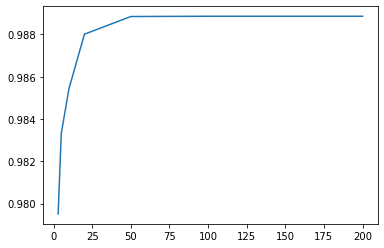

In [323]:
scores = []
N = [3,5,10,20,50,100,200]
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

In [324]:
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(X_train, y_train)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


RandomForestClassifier
score: 0.9882910510175634
precision_score: 0.9884691206441086
recall_score: 0.9882910510175634
f1_score: 0.9882928305403774


In [325]:
clf = BaggingClassifier(RandomForestClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=25)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("BaggingClassifier")
print("score:", clf.score(X_test, y_test))
preds = clf.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))
print(classification_report(y_test, pred))

BaggingClassifier
score: 0.9863395595204907
precision_score: 0.9866442414424341
recall_score: 0.9863395595204907
f1_score: 0.986309917450445
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       494
           2       1.00      0.99      1.00       820
           3       1.00      1.00      1.00       964
           4       0.96      0.99      0.97       151
           5       1.00      0.77      0.87        13
           6       0.97      0.97      0.97       244
           7       1.00      0.98      0.99       130
           8       0.98      0.95      0.96       410
           9       1.00      0.99      0.99       361

    accuracy                           0.99      3587
   macro avg       0.98      0.96      0.97      3587
weighted avg       0.99      0.99      0.99      3587



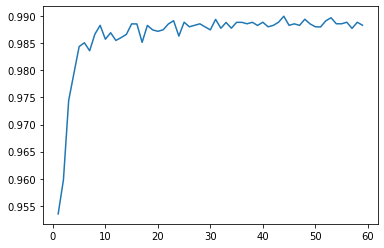

In [326]:
scores = []
N = range(1,60)
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

It uses GridSearchCV, BaggingClassifier and standardizations to improve the performance of the algorithm

In [327]:
pipe = Pipeline([('std',StandardScaler(with_mean=False,with_std=True)),('model',SVC(kernel="poly",C=1,degree=3))])
pipe.fit(X_train, y_train)
print("Pipeline_SVC")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

Pipeline_SVC
score: 0.673543350989685
precision_score: 0.8469058458336753
recall_score: 0.673543350989685
f1_score: 0.6658327637289714


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
pipe = Pipeline([('std',StandardScaler(with_mean=False,with_std=True)),('model',BaggingClassifier(SVC(kernel="poly",C=1,degree=3),n_estimators=100))])
pipe.fit(X_train, y_train)
print("Pipeline_BaggingClassifier")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

Pipeline_BaggingClassifier
score: 0.6754948424867577
precision_score: 0.8462781951003275
recall_score: 0.6754948424867577
f1_score: 0.6680119113091664


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [331]:
models = [SVC(), 
          BaggingClassifier(DecisionTreeClassifier())]
param_list = [
        [
            {"model__kernel":["linear"]},
            {"model__kernel":["rbf"]},
            {"model__kernel":["poly"],"model__degree":[2,3]}
        ],
              
          {"model__base_estimator__min_samples_leaf":[1,5,10,15],
          "model__n_estimators":[10,25,50,100,200]}
         ]

In [332]:
for model, params in zip(models, param_list):
    pipe = Pipeline([("scale",StandardScaler()),("model",model)])
    gs = GridSearchCV(pipe,params)
    gs.fit(X_train,y_train)
   
    print(gs.best_params_)
#     print(f1_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("precision_score:", precision_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("recall_score:", recall_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("f1_score:", f1_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))

{'model__kernel': 'linear'}
precision_score: 0.9607226788860499
recall_score: 0.9601338165597992
f1_score: 0.9595950016366578
{'model__base_estimator__min_samples_leaf': 1, 'model__n_estimators': 25}
precision_score: 0.9873338503980157
recall_score: 0.9871759130192361
f1_score: 0.9871687087455304


I check how the Multi-layer Perceptron Classifier will deal with our data.

In [333]:
from sklearn.neural_network import MLPClassifier


In [334]:
cls_model = MLPClassifier(
    hidden_layer_sizes=(9,8, 4,3,4,2,9),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000,
    batch_size=320)

cls_model.fit(X_train_sc, y_train)

y_pred = cls_model.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.80      0.84       494
           2       0.93      0.96      0.95       820
           3       0.96      1.00      0.98       964
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00       244
           7       0.83      0.85      0.84       130
           8       0.33      0.93      0.48       410
           9       0.00      0.00      0.00       361

    accuracy                           0.73      3587
   macro avg       0.44      0.50      0.45      3587
weighted avg       0.66      0.73      0.68      3587



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [335]:
for hidden_layer_size in [3,5,10,15,25,50,100,200,300,500]:
    rnd.seed(7)
    
    model = MLPClassifier(hidden_layer_size, activation="relu", max_iter=10000, alpha=0.001, tol=0.000001, batch_size=300)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)
    

    print(hidden_layer_size, "Iter: ",model.n_iter_)
    preds = y_pred
    print("precision_score:", precision_score(y_test, preds, average='weighted'))
    print("recall_score:", recall_score(y_test, preds, average='weighted'))
    print("f1_score:", f1_score(y_test, preds, average='weighted'))

3 Iter:  42
precision_score: 0.12009160297177231
recall_score: 0.2879843880680234
f1_score: 0.1528616581034196


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 Iter:  321
precision_score: 0.30084905661844197
recall_score: 0.26902704209645945
f1_score: 0.1144352724249136


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 Iter:  54
precision_score: 0.5759026325461158
recall_score: 0.49316977976024534
f1_score: 0.45690047839920983


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15 Iter:  72
precision_score: 0.6784468669885318
recall_score: 0.722330638416504
f1_score: 0.6485830592167668


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25 Iter:  37
precision_score: 0.6499776365945722
recall_score: 0.6925006969612489
f1_score: 0.6201380222313134


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


50 Iter:  51
precision_score: 0.5312902789627016
recall_score: 0.6657373850013939
f1_score: 0.586532569202563


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100 Iter:  62
precision_score: 0.6127302282804913
recall_score: 0.7181488709227767
f1_score: 0.6448756129040912


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


200 Iter:  23
precision_score: 0.5379176147678529
recall_score: 0.6835795929746306
f1_score: 0.588298809093123


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


300 Iter:  52
precision_score: 0.78033536699762
recall_score: 0.7329244494006133
f1_score: 0.7013692916726781


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


500 Iter:  46
precision_score: 0.7115664151091724
recall_score: 0.7789238918316141
f1_score: 0.7332317373317354


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
import itertools

for h1, h2 in itertools.product([2,5,10,20,30,90],[10,5,3,2,20,90]):
    rnd.seed(7)
    
    model = MLPClassifier((h1,h2), activation="relu", max_iter=10000, alpha=0.0001, tol=0.0001, batch_size=300)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)
    

    
    print(h1, h2,"Iter: ",model.n_iter_)

    preds = y_pred
    print("precision_score:", precision_score(y_test, preds, average='weighted'))
    print("recall_score:", recall_score(y_test, preds, average='weighted'))
    print("f1_score:", f1_score(y_test, preds, average='weighted'))

2 10 Iter:  60
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 5 Iter:  77
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 3 Iter:  130
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 2 Iter:  140
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 20 Iter:  36
precision_score: 0.12757615520449475
recall_score: 0.26930582659604124
f1_score: 0.1152834796183506


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 90 Iter:  16
precision_score: 0.052259464042045706
recall_score: 0.22860328965709506
f1_score: 0.08507133992231357


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 10 Iter:  29
precision_score: 0.21588196908049748
recall_score: 0.28603289657095066
f1_score: 0.15345407326197458


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 5 Iter:  201
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 3 Iter:  143
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 2 Iter:  193
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 20 Iter:  23
precision_score: 0.26212068415277157
recall_score: 0.3824923334262615
f1_score: 0.2619281879672733


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 90 Iter:  34
precision_score: 0.2401257658992721
recall_score: 0.4820183997769724
f1_score: 0.32050611873361184


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 10 Iter:  28
precision_score: 0.34060899331996675
recall_score: 0.3342626149986061
f1_score: 0.21424317488503375


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 5 Iter:  152
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 3 Iter:  178
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 2 Iter:  150
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 20 Iter:  31
precision_score: 0.14268779077653393
recall_score: 0.3197658210203513
f1_score: 0.18171211835069673


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 90 Iter:  72
precision_score: 0.4116854479281097
recall_score: 0.5985503206021745
f1_score: 0.480708391948675


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 10 Iter:  24
precision_score: 0.5993534305060741
recall_score: 0.18985224421522162
f1_score: 0.17689698554761632


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 5 Iter:  155
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 3 Iter:  113
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 2 Iter:  193
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 20 Iter:  30
precision_score: 0.5484416052573456
recall_score: 0.49567884025648173
f1_score: 0.41555972520573203


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20 90 Iter:  36
precision_score: 0.21498394923812936
recall_score: 0.3047114580429328
f1_score: 0.19029465249929164


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 10 Iter:  184
precision_score: 0.2099653097547676
recall_score: 0.26902704209645945
f1_score: 0.114434825156877


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 5 Iter:  145
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 3 Iter:  136
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 2 Iter:  109
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 20 Iter:  36
precision_score: 0.2741367612875745
recall_score: 0.32673543350989687
f1_score: 0.22698564481338734


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 90 Iter:  41
precision_score: 0.5977593605135849
recall_score: 0.6046835795929746
f1_score: 0.5426766576795806


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 10 Iter:  181
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 5 Iter:  146
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 3 Iter:  161
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 2 Iter:  207
precision_score: 0.07222562596135769
recall_score: 0.2687482575968776
f1_score: 0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 20 Iter:  30
precision_score: 0.5252109724998033
recall_score: 0.4376916643434625
f1_score: 0.3959790272955095


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90 90 Iter:  50
precision_score: 0.5150938943092536
recall_score: 0.45218845832171733
f1_score: 0.35990170088730983


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [337]:
rnd.seed(7)
model = MLPClassifier(10, activation="relu", early_stopping=True, validation_fraction=0.2, n_iter_no_change=30, batch_size=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_fitted = model.predict(X_train)

print(h1, h2,"Iter: ",model.n_iter_)

preds = y_pred
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\A

90 90 Iter:  47
precision_score: 0.20578490454371937
recall_score: 0.2765542235851687
f1_score: 0.12932977265974355


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Sequential class was used to check the operation of the algorithm

In [338]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [339]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),metrics=["accuracy"])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                690       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [340]:
model.fit(X_res, y_res)
preds = model.predict(X_test)

print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

113/113 [==============================] - 0s 823us/step
precision_score: 0.018966672467228832
recall_score: 0.1377195427934207
f1_score: 0.03334156047044833


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [341]:
history = model.fit(X_train, y_train, batch_size=160, epochs=100)

Epoch 1/100
46/46 [==============================] - 0s 2ms/step - loss: -55.4926 - accuracy: 0.1438
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: -63.0851 - accuracy: 0.1438
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: -70.5254 - accuracy: 0.1438
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: -77.9051 - accuracy: 0.1438
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: -85.3561 - accuracy: 0.1438
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: -94.0798 - accuracy: 0.1438
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: -103.7205 - accuracy: 0.1438
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: -112.6255 - accuracy: 0.1438
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: -121.1694 - accuracy: 0.1438
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: -129.5290 - ac

46/46 [==============================] - 0s 1ms/step - loss: -665.9214 - accuracy: 0.1438
Epoch 81/100
46/46 [==============================] - 0s 1ms/step - loss: -673.4917 - accuracy: 0.1438
Epoch 82/100
46/46 [==============================] - 0s 1ms/step - loss: -681.0413 - accuracy: 0.1438
Epoch 83/100
46/46 [==============================] - 0s 1ms/step - loss: -688.6223 - accuracy: 0.1438
Epoch 84/100
46/46 [==============================] - 0s 1ms/step - loss: -696.1671 - accuracy: 0.1438
Epoch 85/100
46/46 [==============================] - 0s 1ms/step - loss: -703.7255 - accuracy: 0.1438
Epoch 86/100
46/46 [==============================] - 0s 1ms/step - loss: -711.2939 - accuracy: 0.1438
Epoch 87/100
46/46 [==============================] - 0s 1ms/step - loss: -718.8520 - accuracy: 0.1438
Epoch 88/100
46/46 [==============================] - 0s 1ms/step - loss: -726.4189 - accuracy: 0.1438
Epoch 89/100
46/46 [==============================] - 0s 1ms/step - loss: -733.9832 - 

In [342]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, batch_size=16, callbacks=[early_stopping], validation_split=0.15, epochs=100)
preds = model.predict(X_test)

print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

Epoch 1/100
387/387 [==============================] - 1s 2ms/step - loss: -851.5861 - accuracy: 0.1412 - val_loss: -890.1871 - val_accuracy: 0.1583
Epoch 2/100
387/387 [==============================] - 1s 1ms/step - loss: -914.5204 - accuracy: 0.1412 - val_loss: -953.3218 - val_accuracy: 0.1583
Epoch 3/100
387/387 [==============================] - 1s 1ms/step - loss: -977.3078 - accuracy: 0.1412 - val_loss: -1016.4173 - val_accuracy: 0.1583
Epoch 4/100
387/387 [==============================] - 1s 1ms/step - loss: -1039.8651 - accuracy: 0.1412 - val_loss: -1079.4457 - val_accuracy: 0.1583
Epoch 5/100
387/387 [==============================] - 1s 1ms/step - loss: -1102.1245 - accuracy: 0.1412 - val_loss: -1142.2396 - val_accuracy: 0.1583
Epoch 6/100
387/387 [==============================] - 1s 1ms/step - loss: -1164.4290 - accuracy: 0.1412 - val_loss: -1204.8090 - val_accuracy: 0.1583
Epoch 7/100
387/387 [==============================] - 1s 1ms/step - loss: -1226.8110 - accuracy: 0

Epoch 55/100
387/387 [==============================] - 1s 1ms/step - loss: -4207.1421 - accuracy: 0.1412 - val_loss: -4271.0854 - val_accuracy: 0.1583
Epoch 56/100
387/387 [==============================] - 1s 1ms/step - loss: -4269.2280 - accuracy: 0.1412 - val_loss: -4333.4570 - val_accuracy: 0.1583
Epoch 57/100
387/387 [==============================] - 1s 1ms/step - loss: -4331.3359 - accuracy: 0.1412 - val_loss: -4396.0562 - val_accuracy: 0.1583
Epoch 58/100
387/387 [==============================] - 1s 1ms/step - loss: -4393.3716 - accuracy: 0.1412 - val_loss: -4458.6035 - val_accuracy: 0.1583
Epoch 59/100
387/387 [==============================] - 1s 2ms/step - loss: -4455.4756 - accuracy: 0.1412 - val_loss: -4521.0425 - val_accuracy: 0.1583
Epoch 60/100
387/387 [==============================] - 1s 2ms/step - loss: -4517.5161 - accuracy: 0.1412 - val_loss: -4583.7100 - val_accuracy: 0.1583
Epoch 61/100
387/387 [==============================] - 1s 1ms/step - loss: -4579.5205 -

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finally, we use linear dimensionality reduction to project it to a lower dimensional space

In [343]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [344]:
pca = PCA()
pca.fit(scale(X_train))
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(3)),('rfc',RandomForestClassifier())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("PCA")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

PCA
score: 0.8915528296626708
precision_score: 0.8937170415204113
recall_score: 0.8915528296626708
f1_score: 0.8918139094926562
